# Joint Network Model evaluation

In [1]:
from interp.models import DummyJointModel
from interp.train import evaluate_joint
from interp.dataset import HDF5Dataset, nested_custom_collate
from torch.utils.data import DataLoader
import os

alg = "bellman_ford_bfs"
data_source = os.path.join("data", alg)

val_dataset_ood = HDF5Dataset(os.path.join("data", alg, "interp_data_OOD_eval.h5"), nested=True)
val_dataloader_ood = DataLoader(val_dataset_ood, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)
val_dataset_16 = HDF5Dataset(os.path.join("data", alg, "interp_data_16_eval.h5"), nested=True)
val_dataloader_16 = DataLoader(val_dataset_16, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)
val_dataset_8 = HDF5Dataset(os.path.join("data", alg, "interp_data_8_eval.h5"), nested=True)
val_dataloader_8 = DataLoader(val_dataset_8, batch_size=4, shuffle=True, collate_fn=nested_custom_collate) 
val_dataset_all = HDF5Dataset(os.path.join("data", alg, "interp_data_all_eval.h5"), nested=True)
val_dataloader_all = DataLoader(val_dataset_all, batch_size=4, shuffle=True, collate_fn=nested_custom_collate)


In [2]:
from interp.metric import LossFunction

loss_fn = LossFunction()

m = DummyJointModel()
print("performing evaluation on OOD dataset")
print(evaluate_joint(m, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate_joint(m, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate_joint(m, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate_joint(m, val_dataloader_all, "cpu", loss_fn=loss_fn))


performing evaluation on OOD dataset
(4.505674538264006, {'bellman_ford': 4.143027413850543, 'bfs': 4.868321662677468})
performing evaluation on 16 dataset
(3.137599645538679, {'bellman_ford': 3.129542412219849, 'bfs': 3.1456568788575088})
performing evaluation on 8 dataset
(2.4450662390671907, {'bellman_ford': 2.457952007115316, 'bfs': 2.4321804710190658})
performing evaluation on all dataset
(2.8770501812206533, {'bellman_ford': 2.962067416402919, 'bfs': 2.792032946038387})


In [4]:
from interp.config import create_model_from_config, load_config
import torch

model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)

model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

print("performing evaluation on OOD dataset")
print(evaluate_joint(model, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate_joint(model, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate_joint(model, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate_joint(model, val_dataloader_all, "cpu", loss_fn=loss_fn))

performing evaluation on OOD dataset
(0.08179598492094672, {'bellman_ford': 0.12858259588822551, 'bfs': 0.03500937395366795})
performing evaluation on 16 dataset
(0.01670221252319298, {'bellman_ford': 0.03232863096168954, 'bfs': 0.0010757940846964184})
performing evaluation on 8 dataset
(0.003558145018797655, {'bellman_ford': 0.00678666425906963, 'bfs': 0.0003296257785256798})
performing evaluation on all dataset
(0.014562840667681032, {'bellman_ford': 0.027111449306343988, 'bfs': 0.0020142320290180787})


# Single algorithm training evaluation

In [5]:
from interp.models import DummyModel
from interp.train import evaluate
from interp.dataset import HDF5Dataset, custom_collate
from torch.utils.data import DataLoader
import os

alg = "bfs"
data_source = os.path.join("data", alg)

val_dataset_ood = HDF5Dataset(os.path.join("data", alg, "interp_data_OOD_eval.h5"), nested=False)
val_dataloader_ood = DataLoader(val_dataset_ood, batch_size=4, shuffle=True, collate_fn=custom_collate)
val_dataset_16 = HDF5Dataset(os.path.join("data", alg, "interp_data_16_eval.h5"), nested=False)
val_dataloader_16 = DataLoader(val_dataset_16, batch_size=4, shuffle=True, collate_fn=custom_collate)
val_dataset_8 = HDF5Dataset(os.path.join("data", alg, "interp_data_8_eval.h5"), nested=False)
val_dataloader_8 = DataLoader(val_dataset_8, batch_size=4, shuffle=True, collate_fn=custom_collate) 
val_dataset_all = HDF5Dataset(os.path.join("data", alg, "interp_data_all_eval.h5"), nested=False)
val_dataloader_all = DataLoader(val_dataset_all, batch_size=4, shuffle=True, collate_fn=custom_collate)

In [6]:
from interp.metric import LossFunction

loss_fn = LossFunction()

m = DummyModel()
print("performing evaluation on OOD dataset")
print(evaluate(m, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate(m, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate(m, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate(m, val_dataloader_all, "cpu", loss_fn=loss_fn))

performing evaluation on OOD dataset
4.856802121775684
performing evaluation on 16 dataset
3.1427911783485722
performing evaluation on 8 dataset
2.455556582431404
performing evaluation on all dataset
2.738420484909816


In [7]:
from interp.config import create_model_from_config, load_config
import torch

model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)

model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

print("performing evaluation on OOD dataset")
print(evaluate(model, val_dataloader_ood, "cpu", loss_fn=loss_fn))
print("performing evaluation on 16 dataset")
print(evaluate(model, val_dataloader_16, "cpu", loss_fn=loss_fn))
print("performing evaluation on 8 dataset")
print(evaluate(model, val_dataloader_8, "cpu", loss_fn=loss_fn))
print("performing evaluation on all dataset")
print(evaluate(model, val_dataloader_all, "cpu", loss_fn=loss_fn))

performing evaluation on OOD dataset
0.026818544909515664
performing evaluation on 16 dataset
0.001016766672680965
performing evaluation on 8 dataset
0.0007037923964517682
performing evaluation on all dataset
0.0007954400513333528


# Visualisation

## Getting singular model stats

Evaluating: 100%|██████████| 5/5 [00:00<00:00,  8.28it/s]


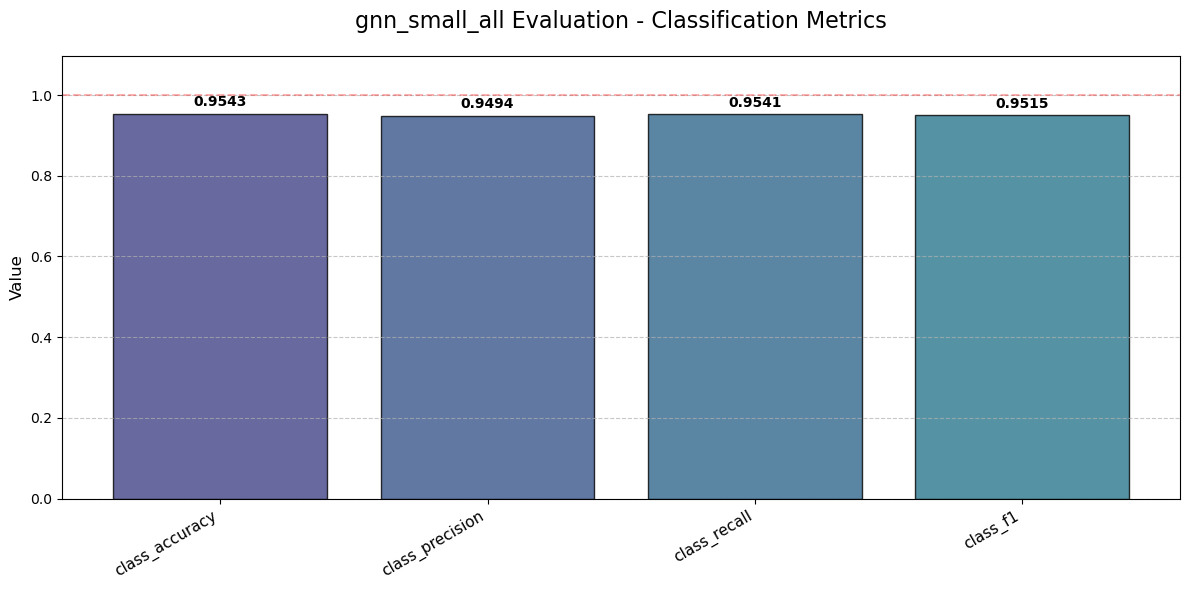

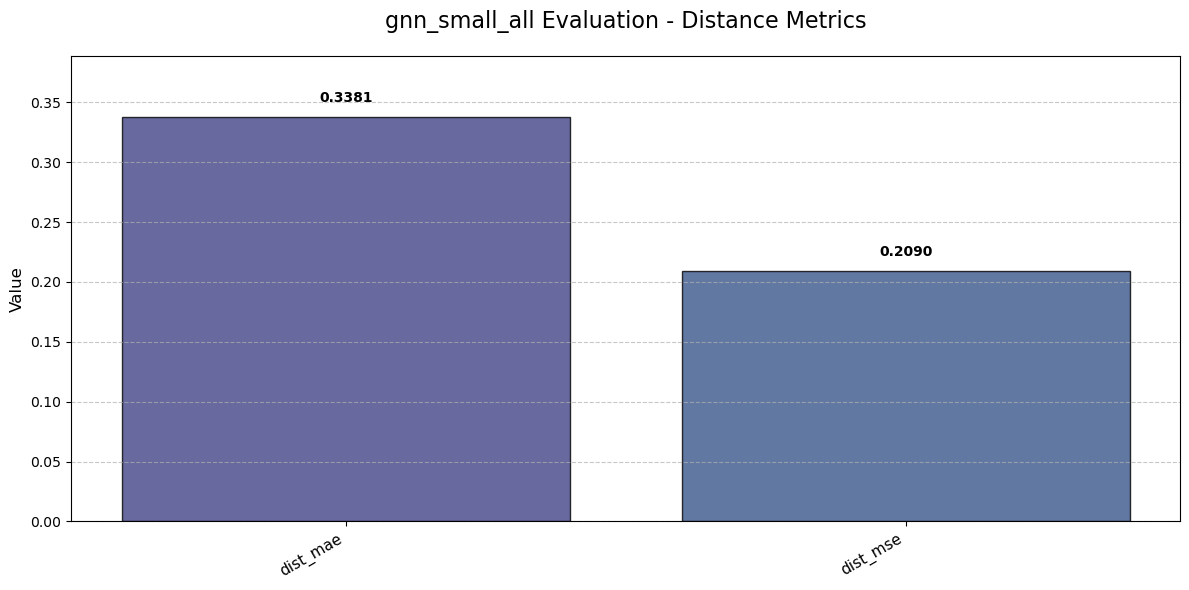

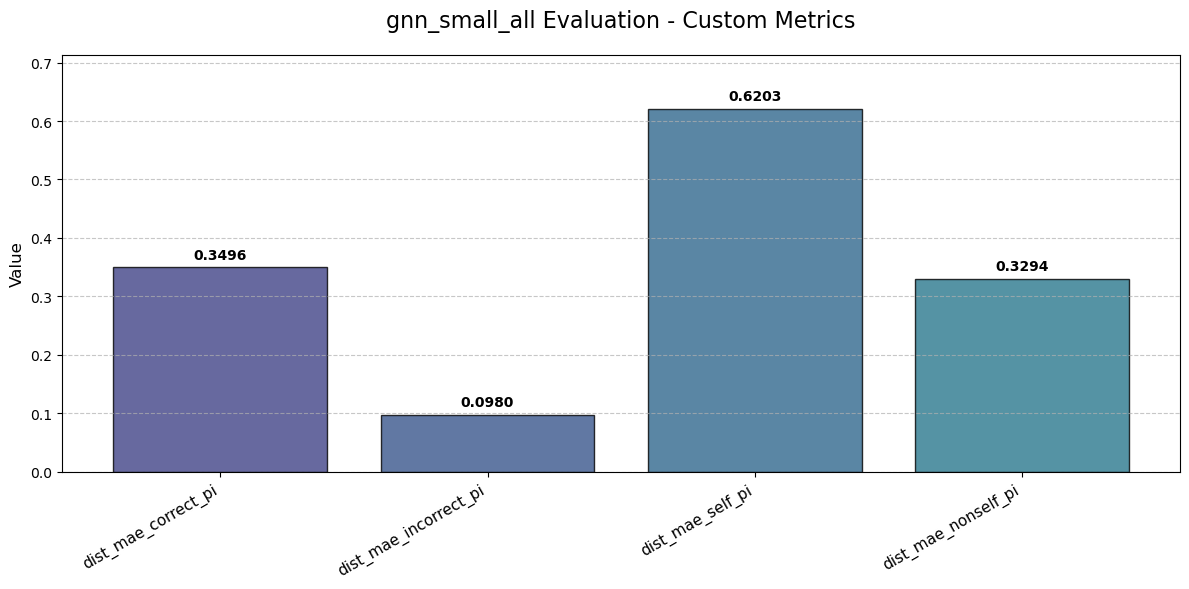

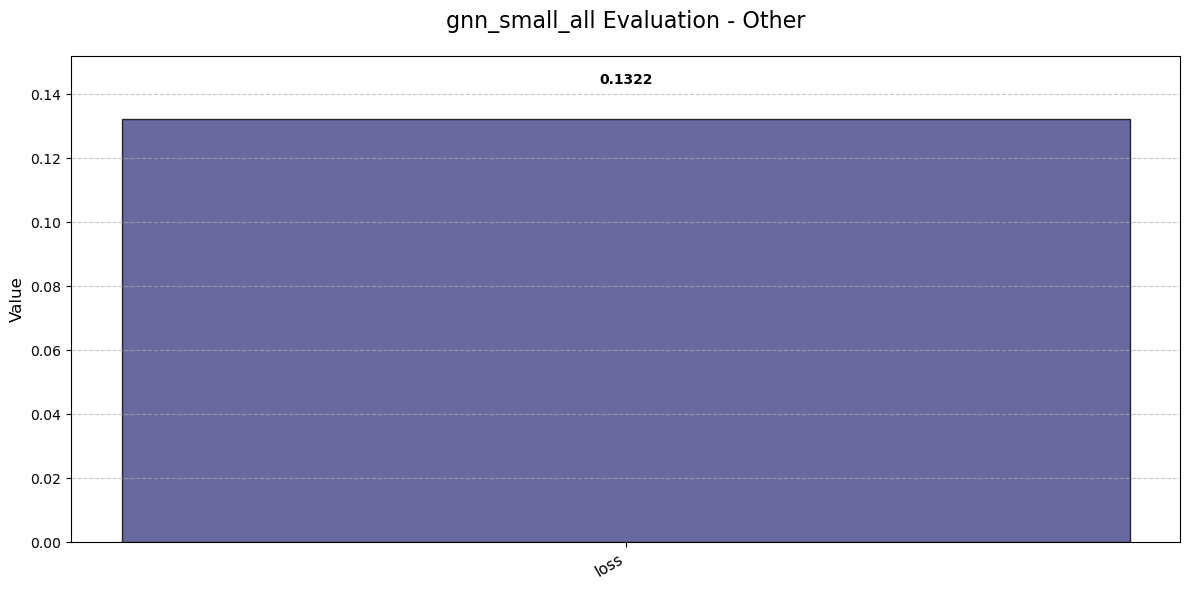

In [8]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import evaluate_model_on_dataset, visualize_results
import torch
import os

# Path to the saved model and its configuration
checkpoint_dir = "interp_checkpoints/bellman_ford/gnn_small_all"
model_name = "gnn_small_all"
config_path = os.path.join(checkpoint_dir, f"{model_name}_config.json")
model_path = os.path.join(checkpoint_dir, f"{model_name}.pth")

# Load the configuration
config = load_config(config_path)

# Create the model from the configuration
model = create_model_from_config(config)

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Evaluate the model
results = evaluate_model_on_dataset(
    model, 
    dataset_path="data/bellman_ford/interp_data_OOD_eval.h5",
    batch_size=16
)

# Visualize the results
visualize_results(results, title=f"{model_name} Evaluation")

## Comparing Multiple Models

Evaluating MLP...


Evaluating: 100%|██████████| 5/5 [00:00<00:00, 12.93it/s]


Evaluating GNN...


Evaluating: 100%|██████████| 5/5 [00:00<00:00, 15.43it/s]


class_accuracy


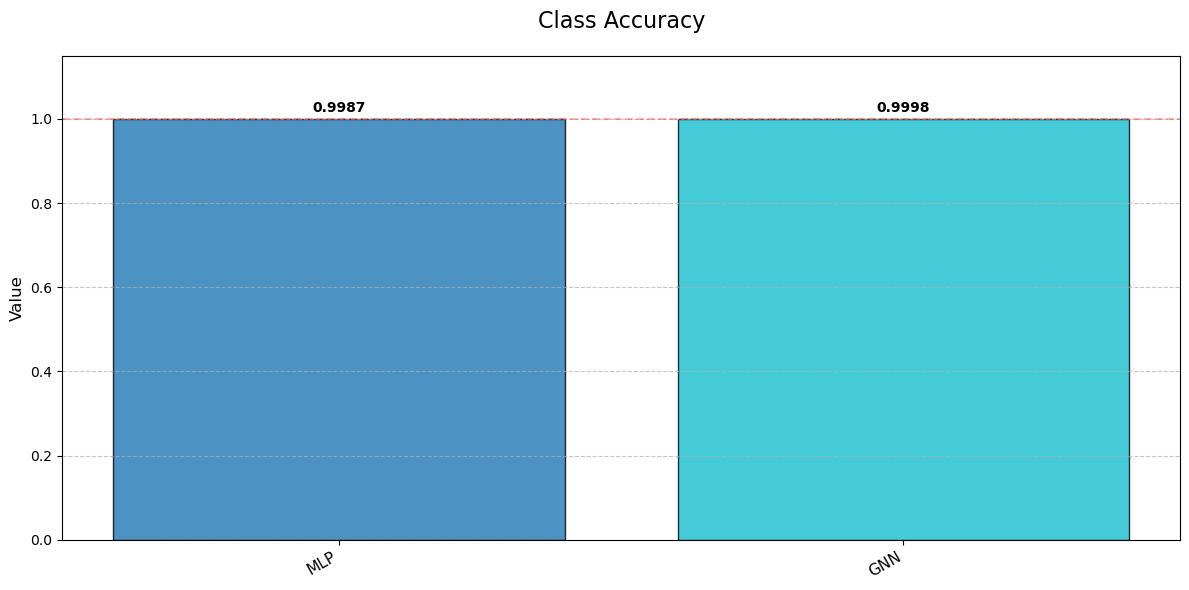

class_precision


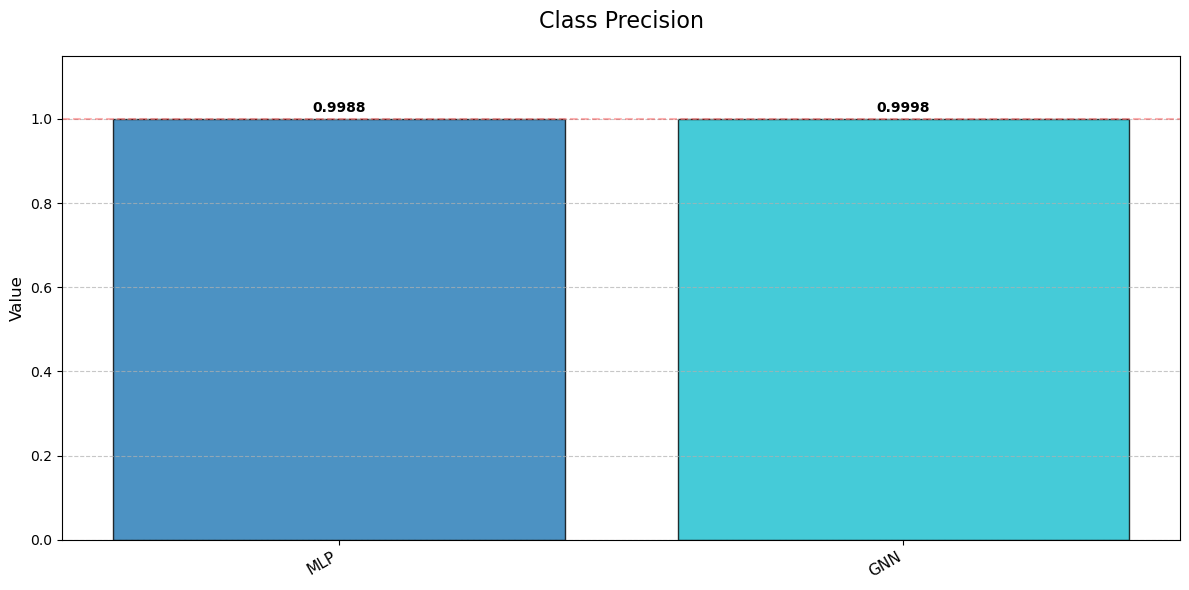

class_recall


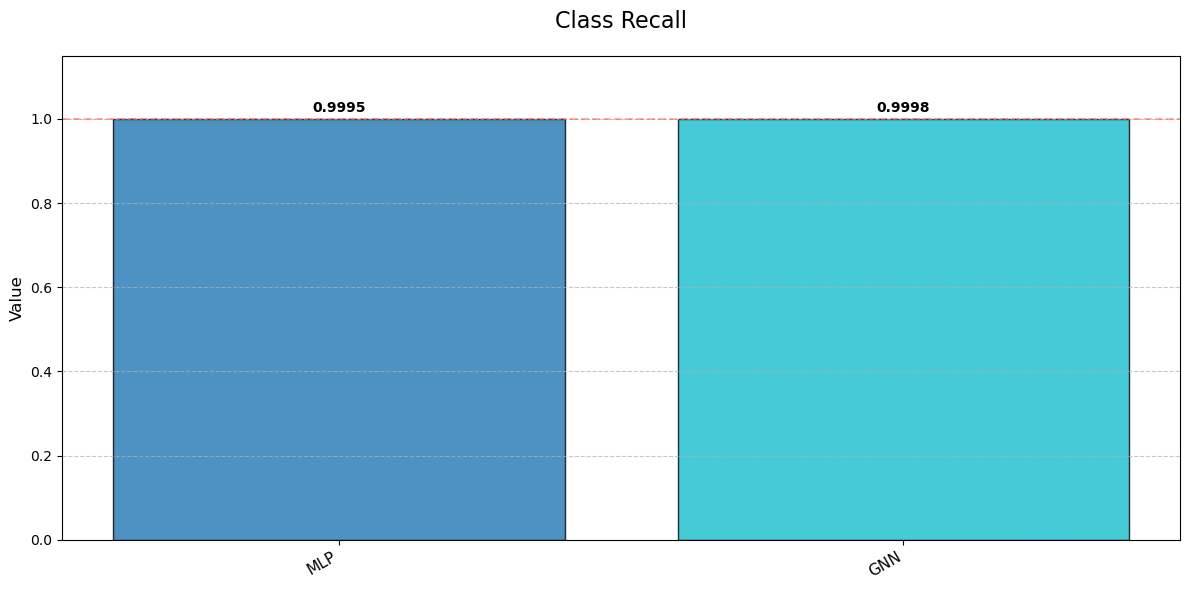

class_f1


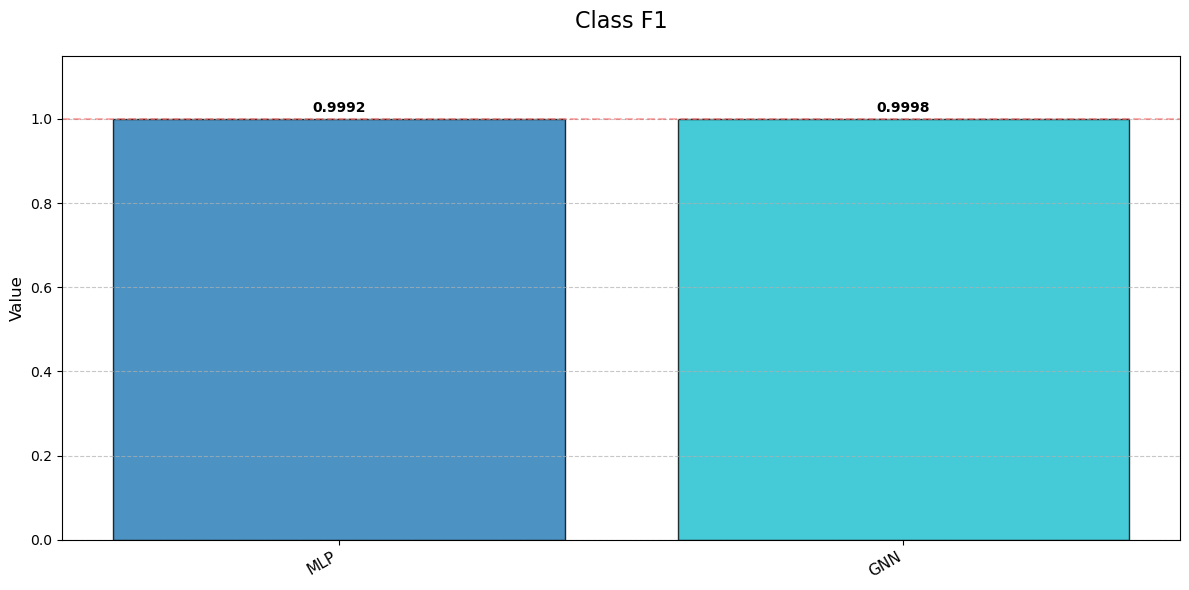

dist_mae


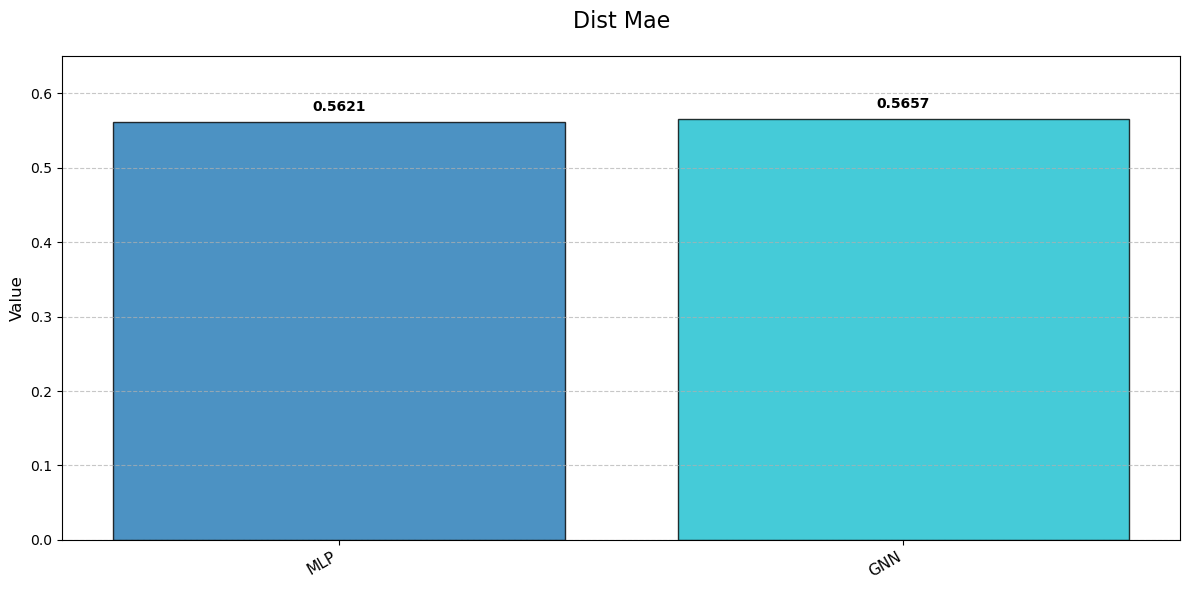

dist_mse


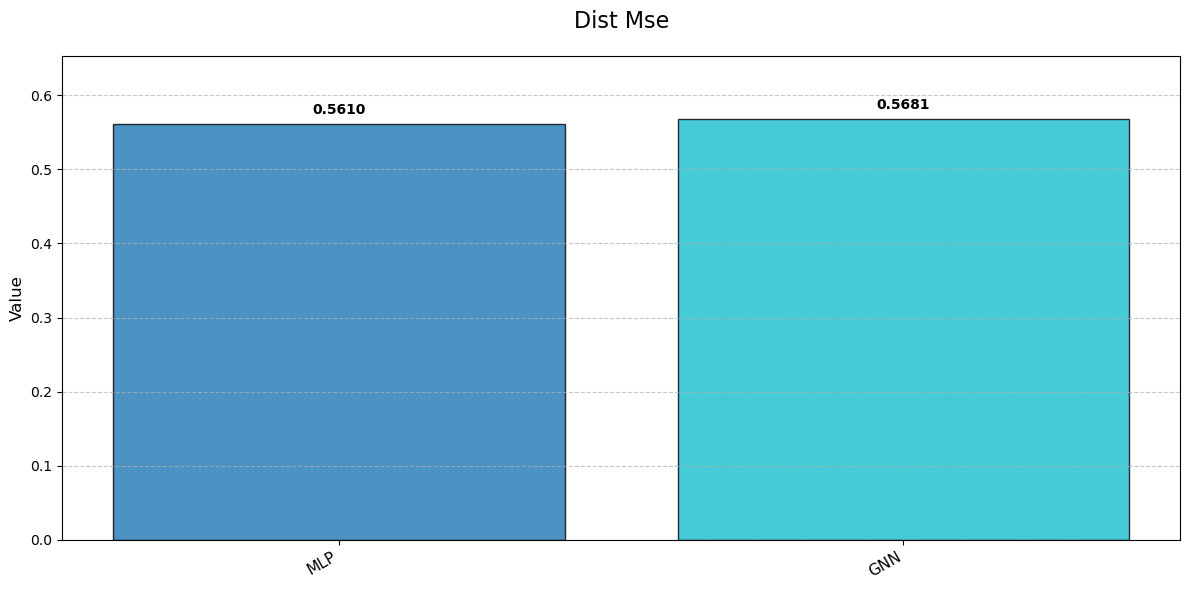

dist_mae_correct_pi


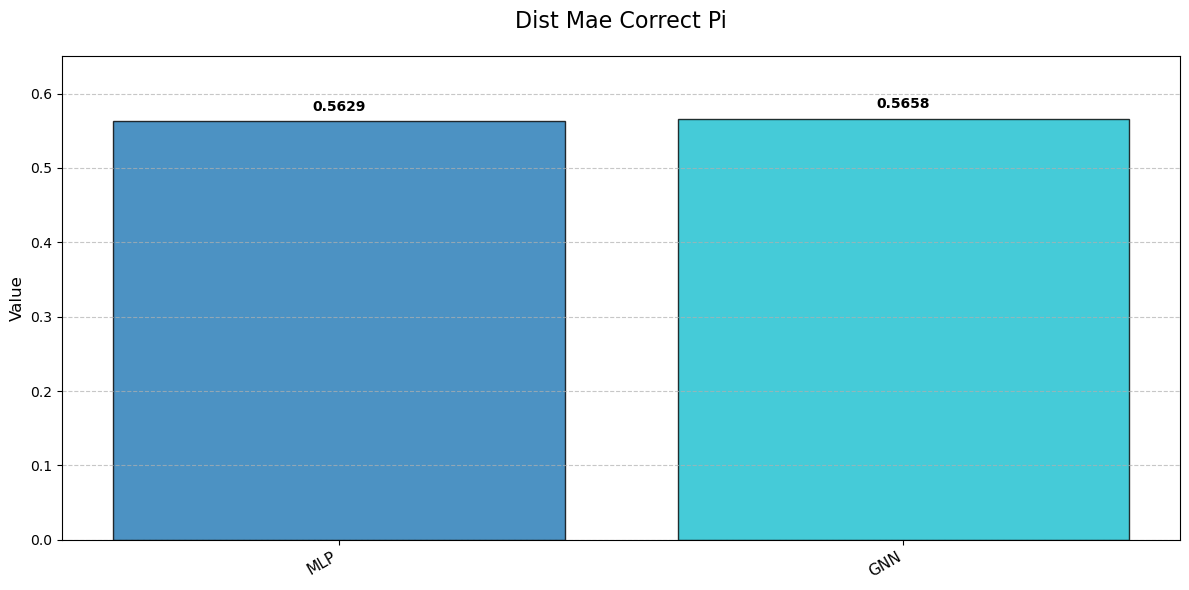

dist_mae_incorrect_pi


/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:781: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


dist_mae_self_pi


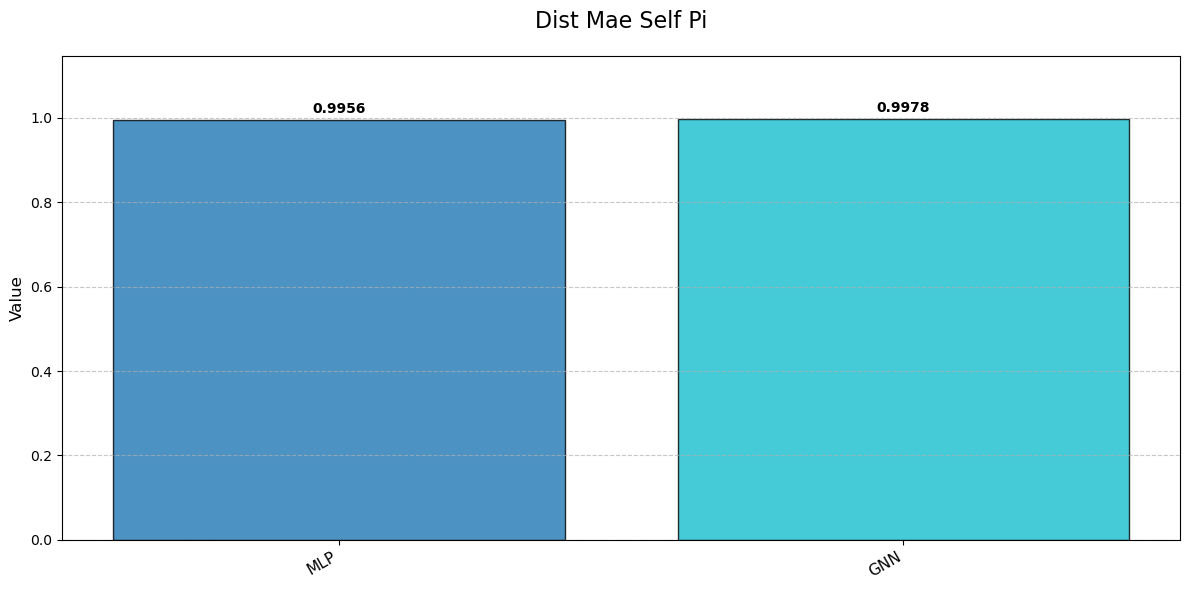

dist_mae_nonself_pi


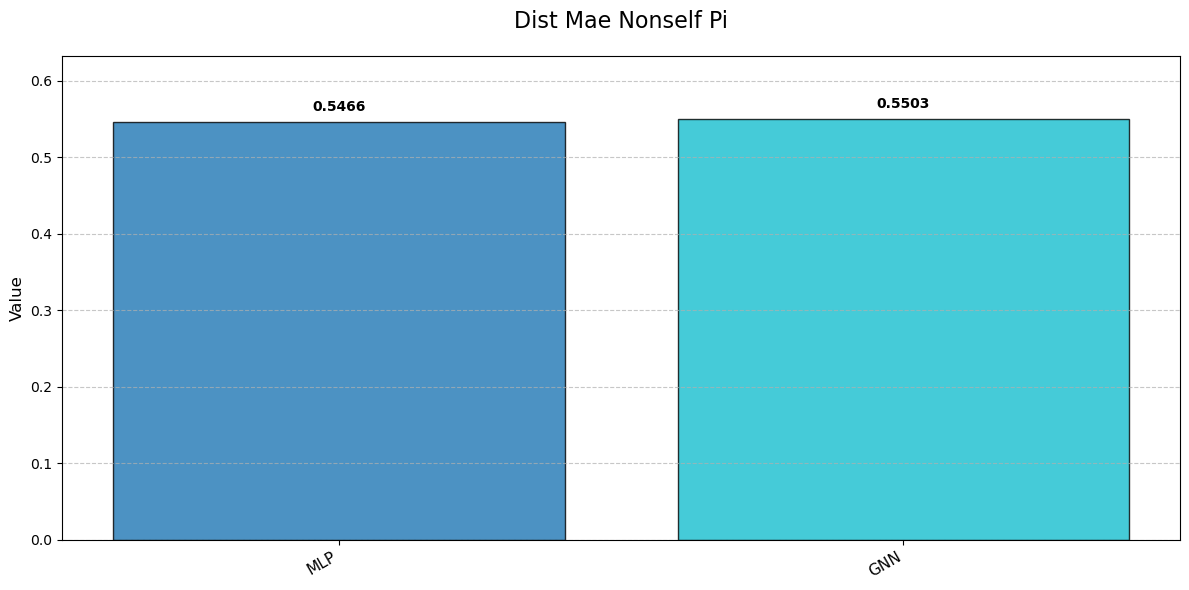

loss


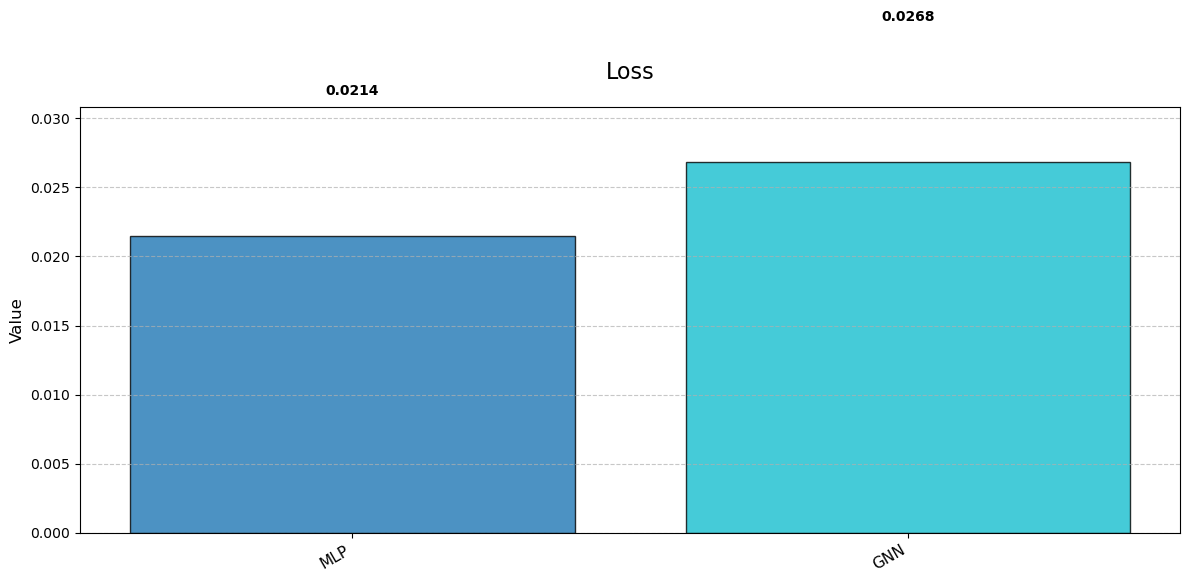

In [1]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import compare_models, visualize_comparison
import torch
import os

# Define model configurations and paths
model_configs = [
    {
        "name": "MLP",
        "checkpoint_dir": "interp_checkpoints/bfs/mlp_diff_all",
        "model_name": "mlp_diff_all"
    },
    {
        "name": "GNN",
        "checkpoint_dir": "interp_checkpoints/bfs/gnn_small_all",
        "model_name": "gnn_small_all"
    },
]

# Load models from configs
models = []
model_names = []

for model_config in model_configs:
    config_path = os.path.join(model_config["checkpoint_dir"], f"{model_config['model_name']}_config.json")
    model_path = os.path.join(model_config["checkpoint_dir"], f"{model_config['model_name']}.pth")
    
    # Load the configuration
    config = load_config(config_path)
    
    # Create the model from the configuration
    model = create_model_from_config(config)
    
    # Load the saved weights
    model.load_state_dict(torch.load(model_path))
    
    models.append(model)
    model_names.append(model_config["name"])

# Compare models
comparison_results = compare_models(
    models,
    model_names,
    dataset_path="data/bfs/interp_data_OOD_eval.h5",
    batch_size=16
)

# Visualize comparison
visualize_comparison(comparison_results)

## Visualise examples

Performing comprehensive model behavior analysis...


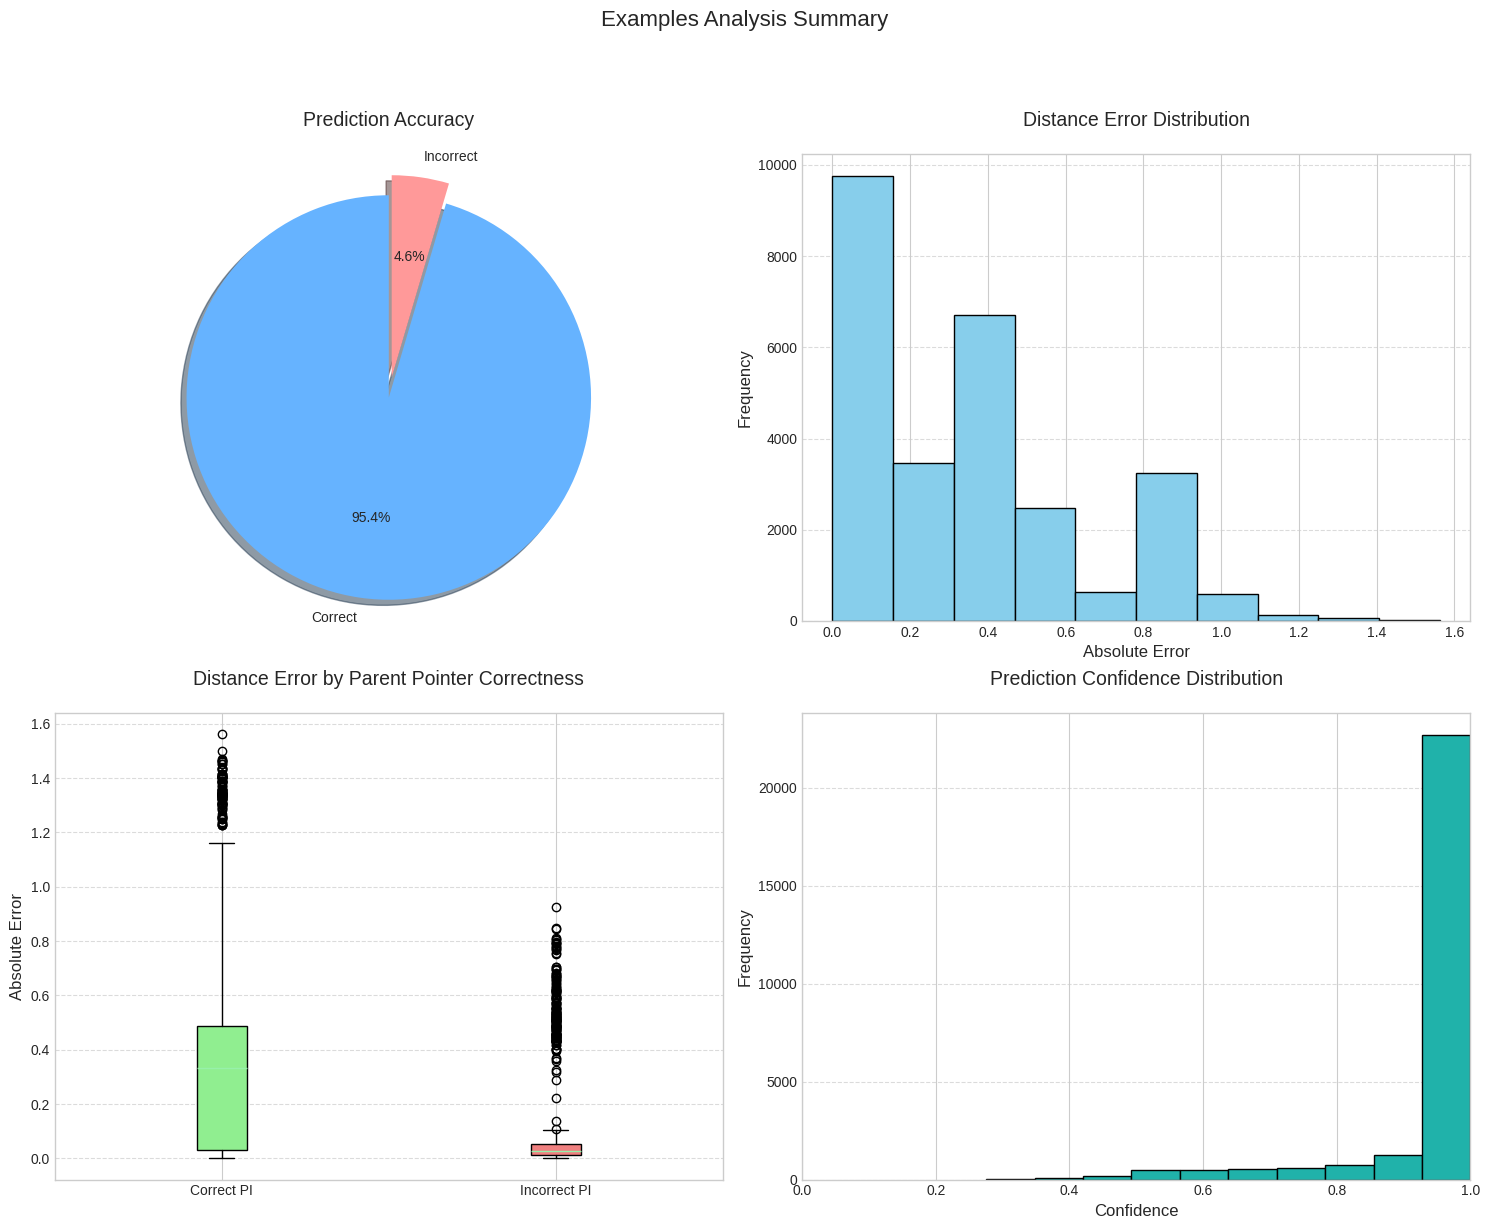


===== Model Behavior Analysis =====
Number of examples analyzed: 27072
Accuracy: 0.9543
Average distance error: 0.3381
Average distance error (correct PI): 0.3496
Average distance error (incorrect PI): 0.0980
Average confidence: 0.9515
Average confidence (correct): 0.9633
Average confidence (incorrect): 0.7036


Visualizing example 1 (correct)...


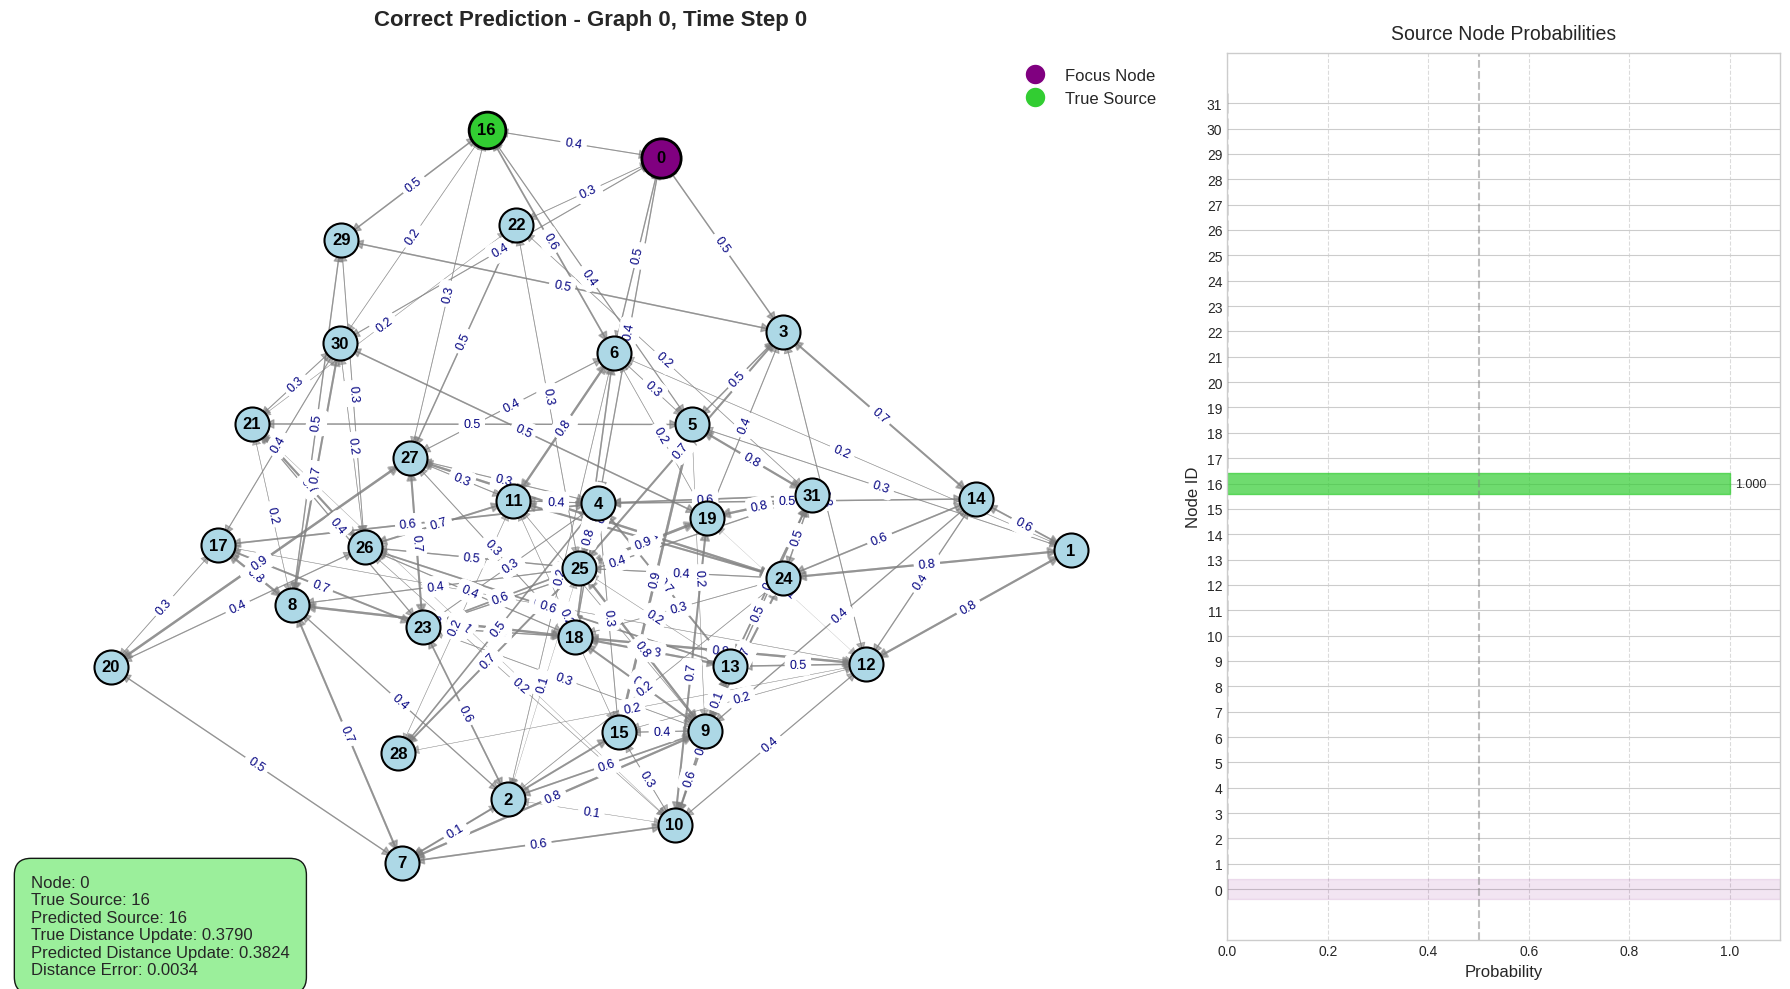


Visualizing example 2 (correct)...


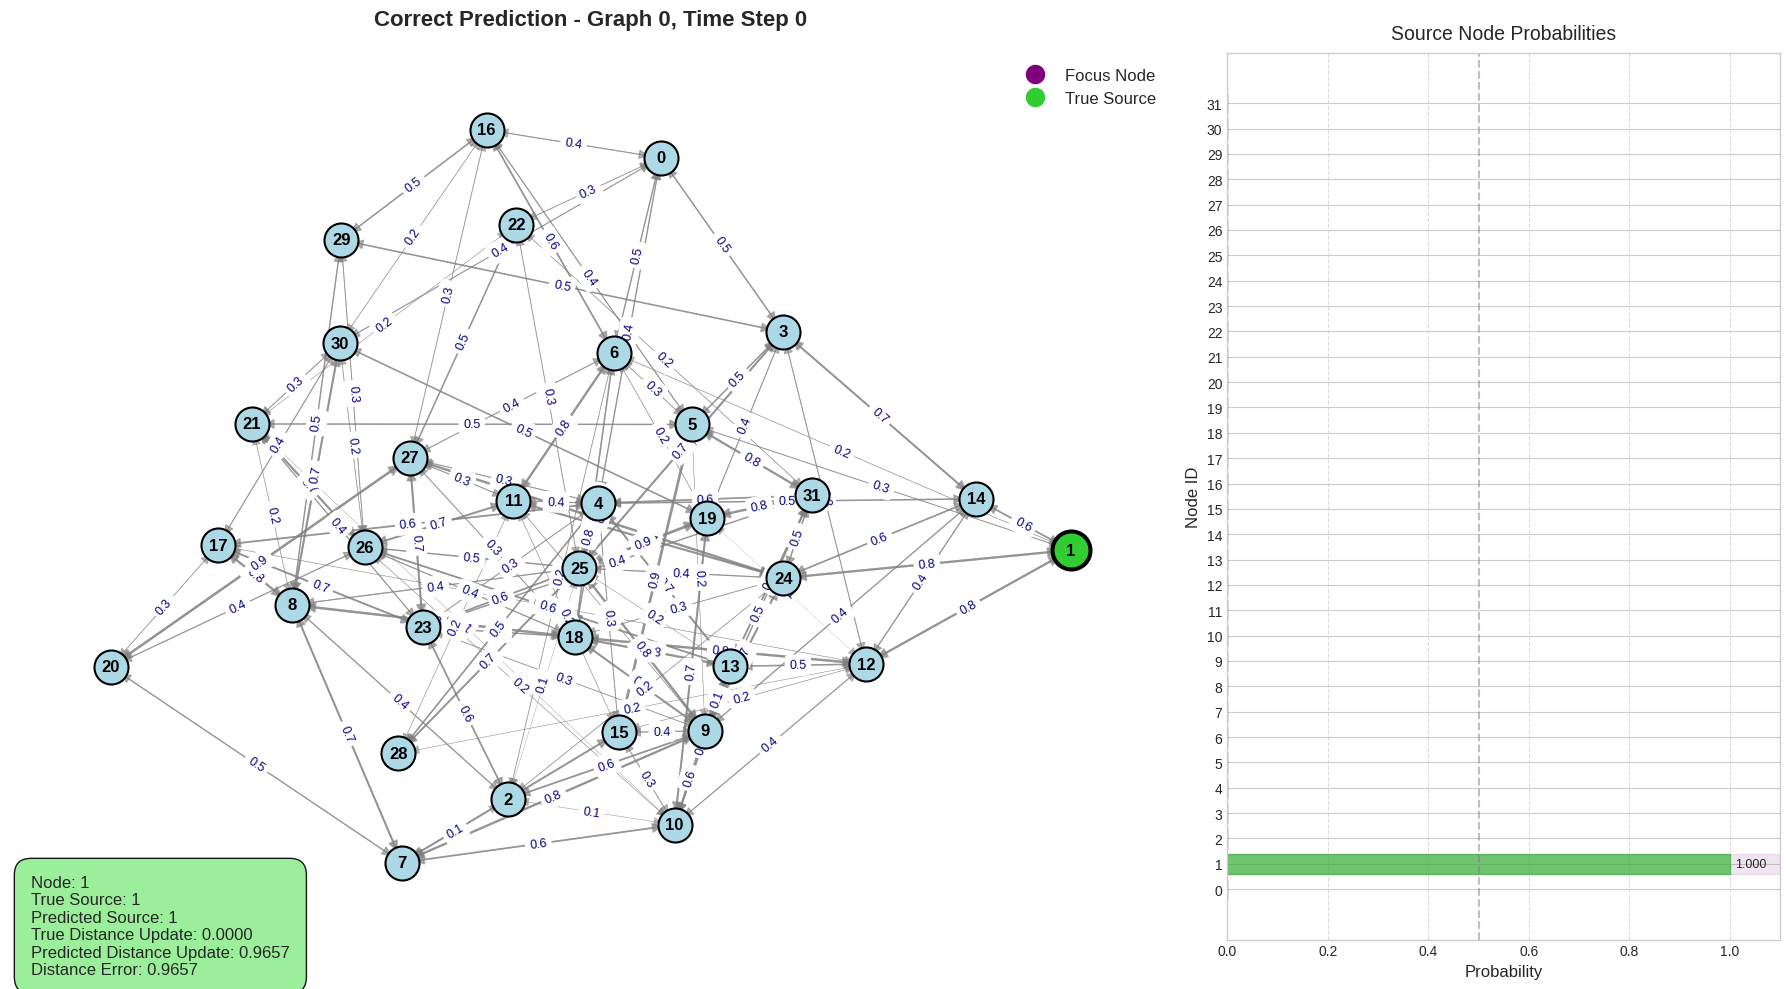


Visualizing example 3 (correct)...


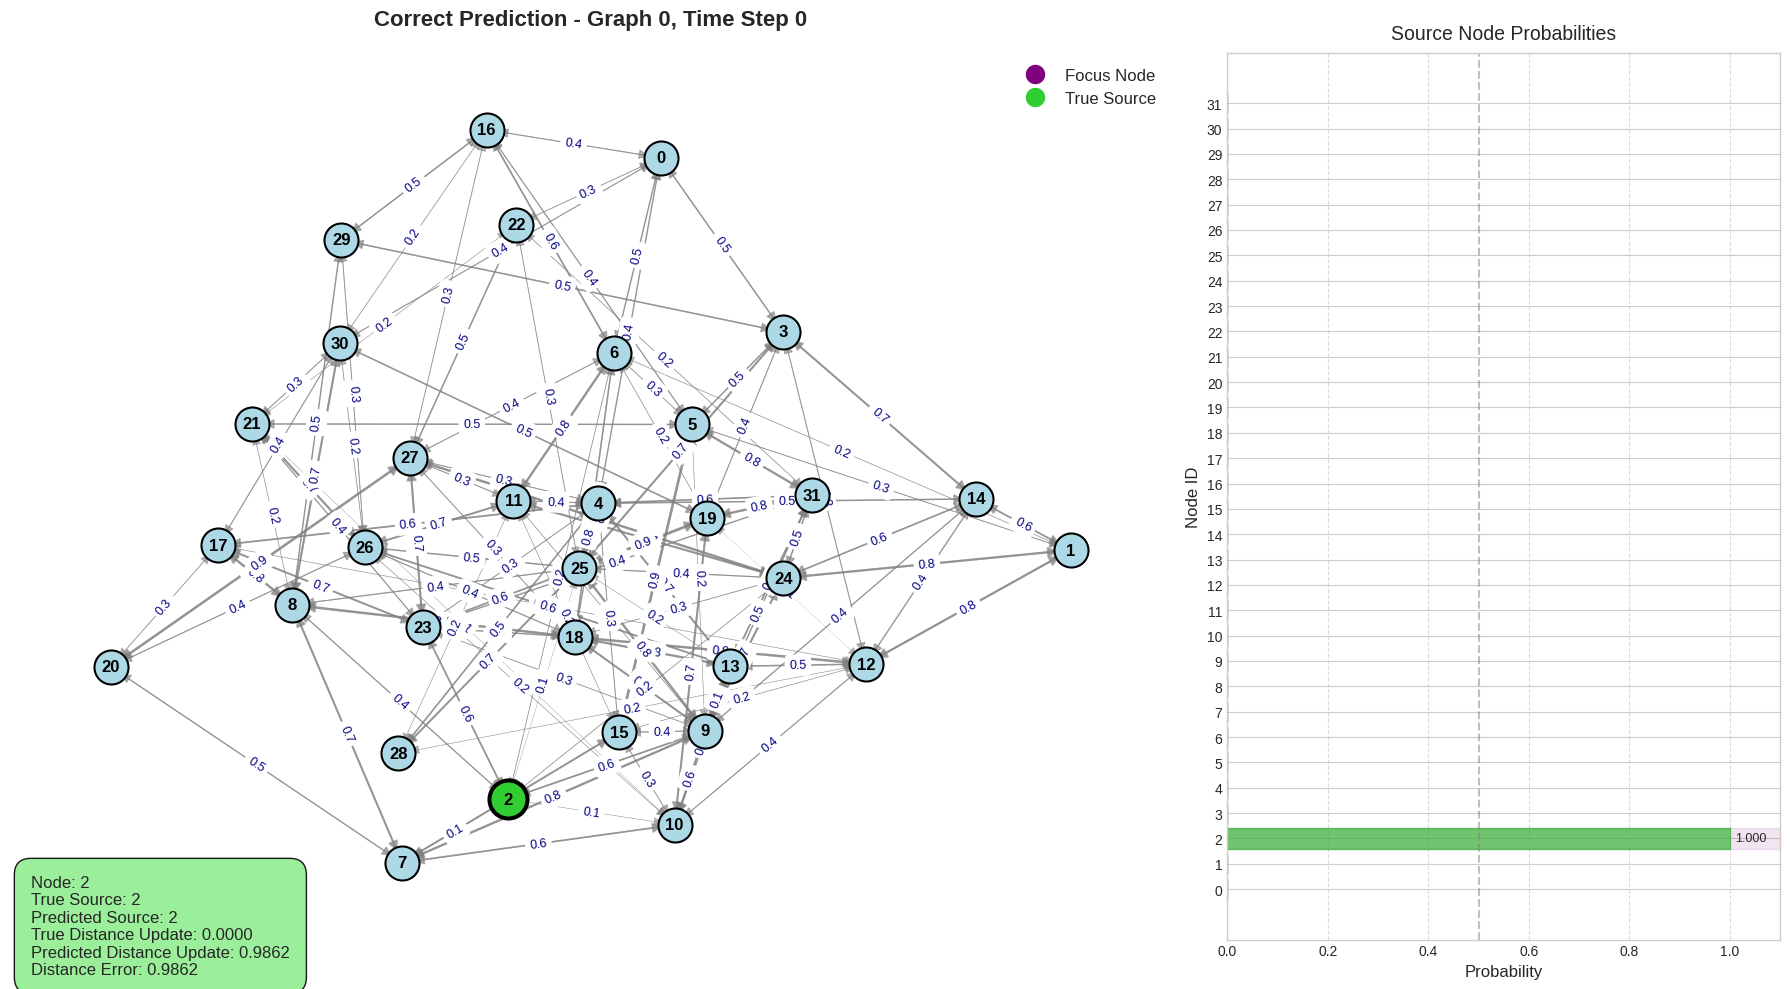


Visualizing example 4 (correct)...


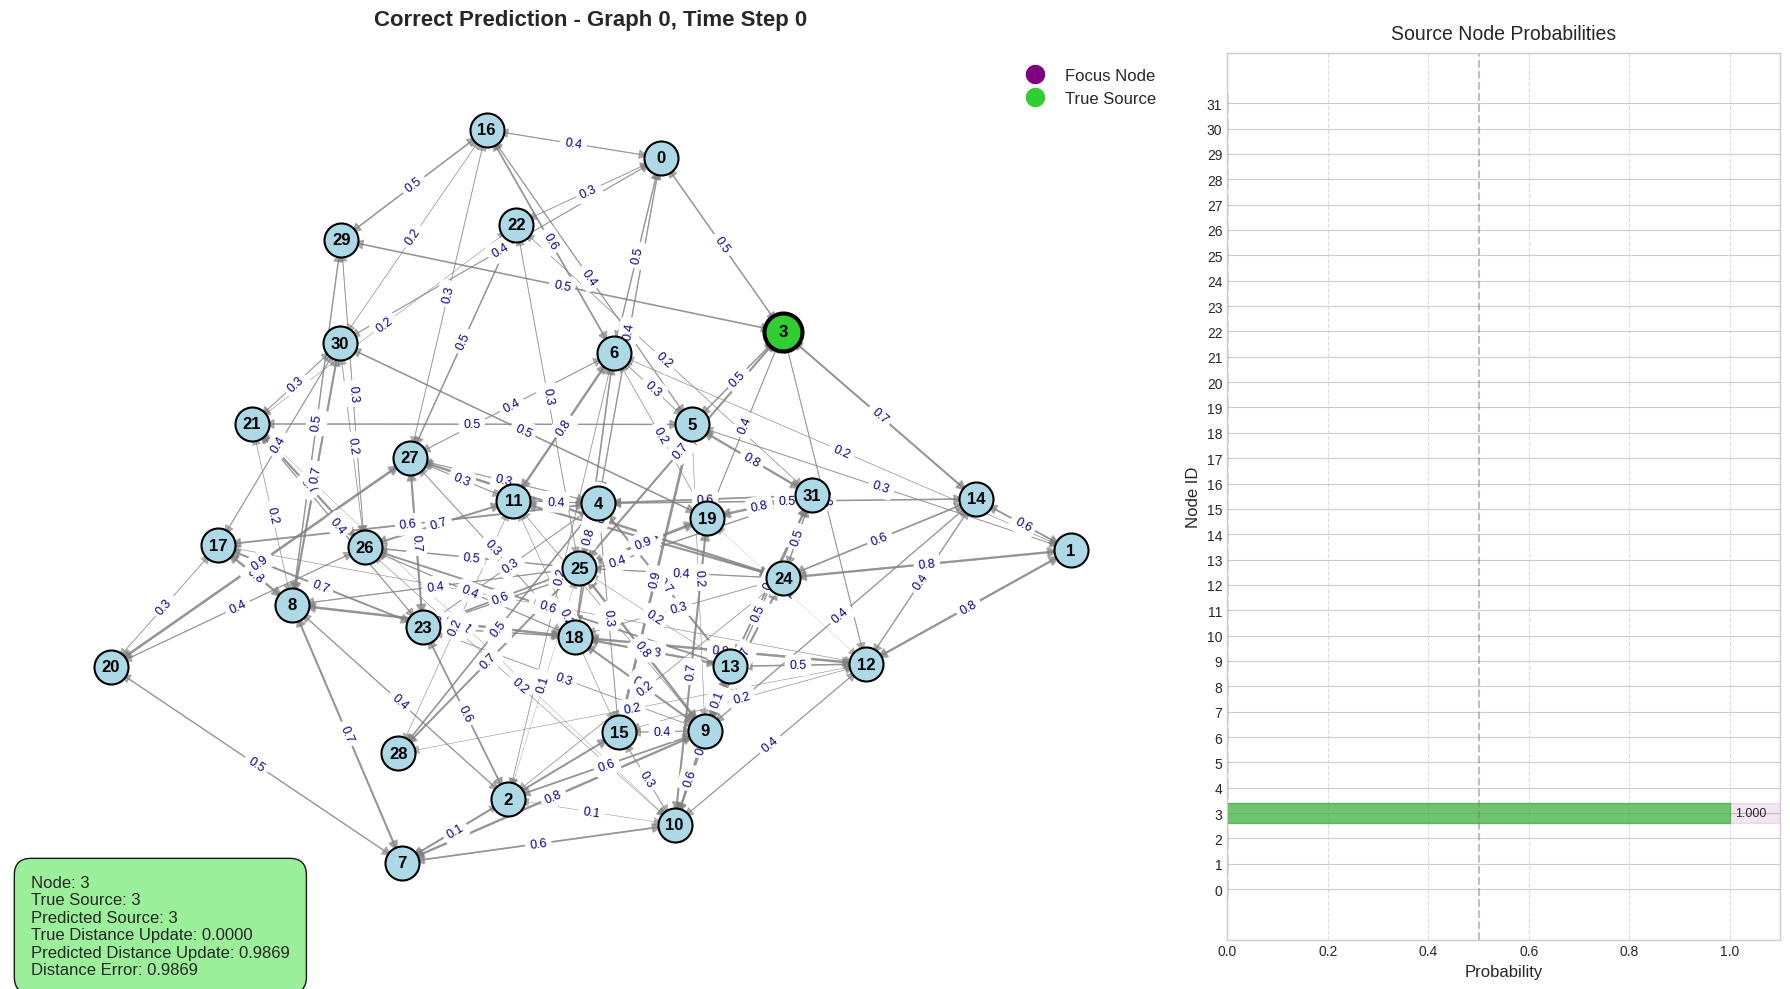


Visualizing example 5 (correct)...


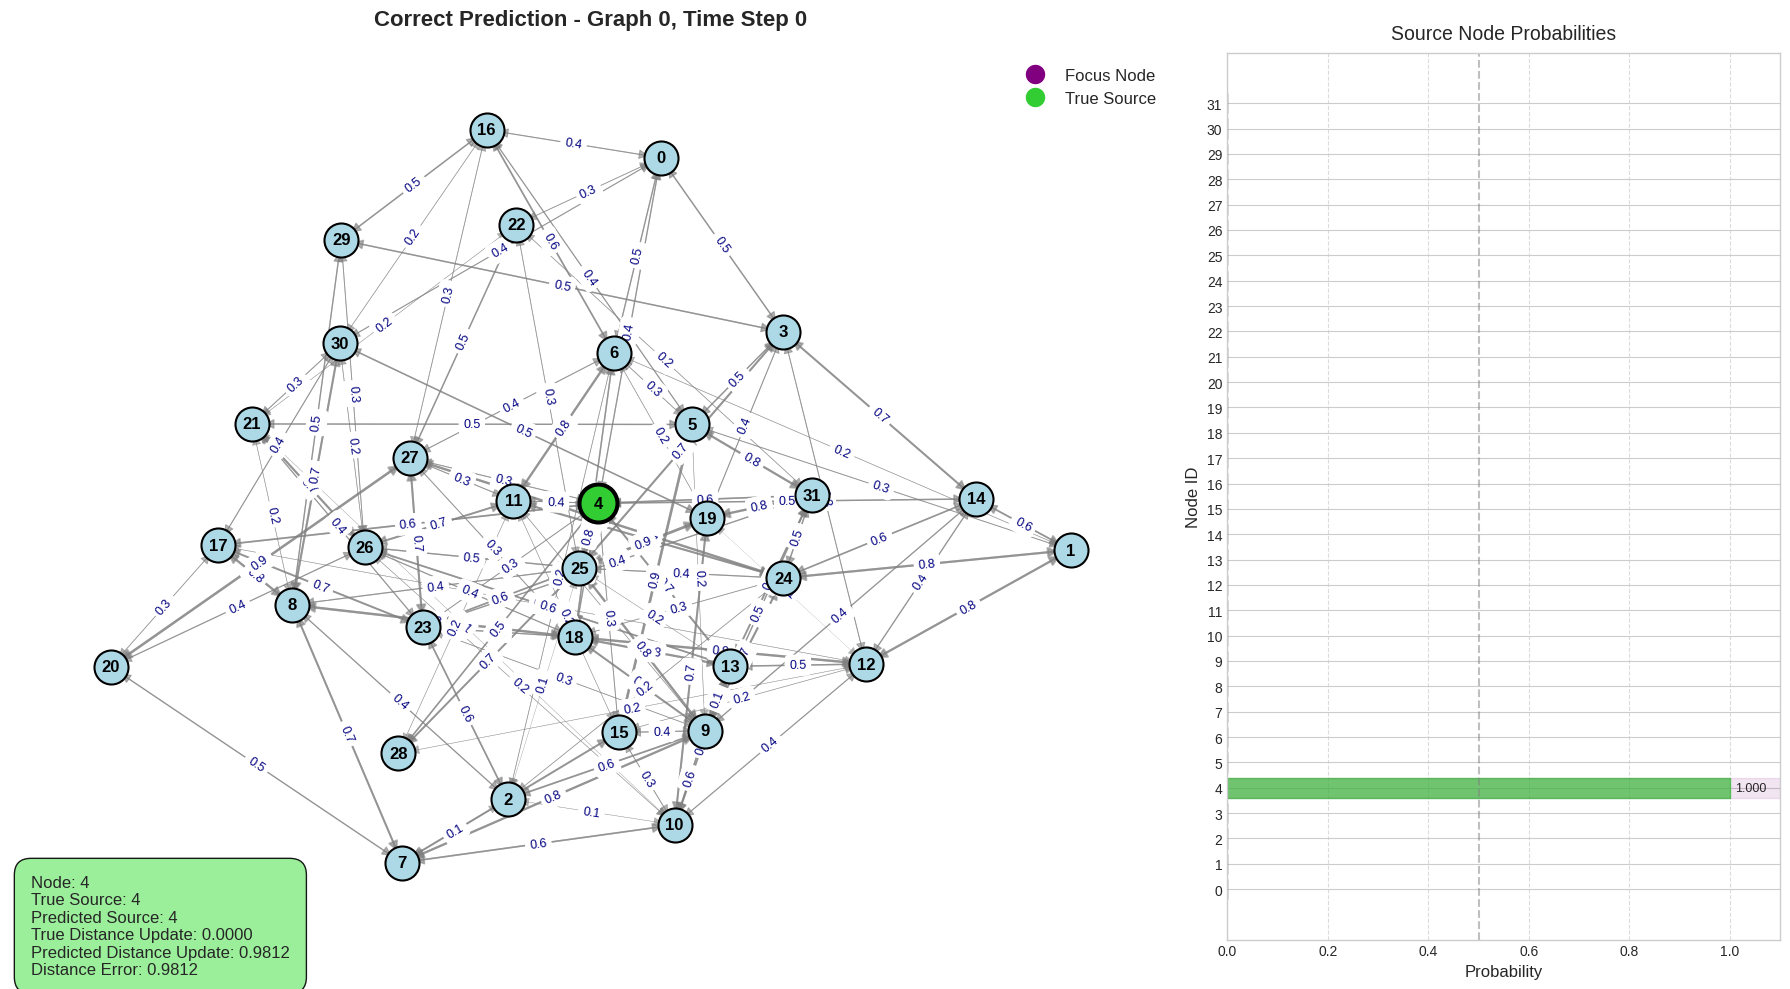



Visualizing error example 1...


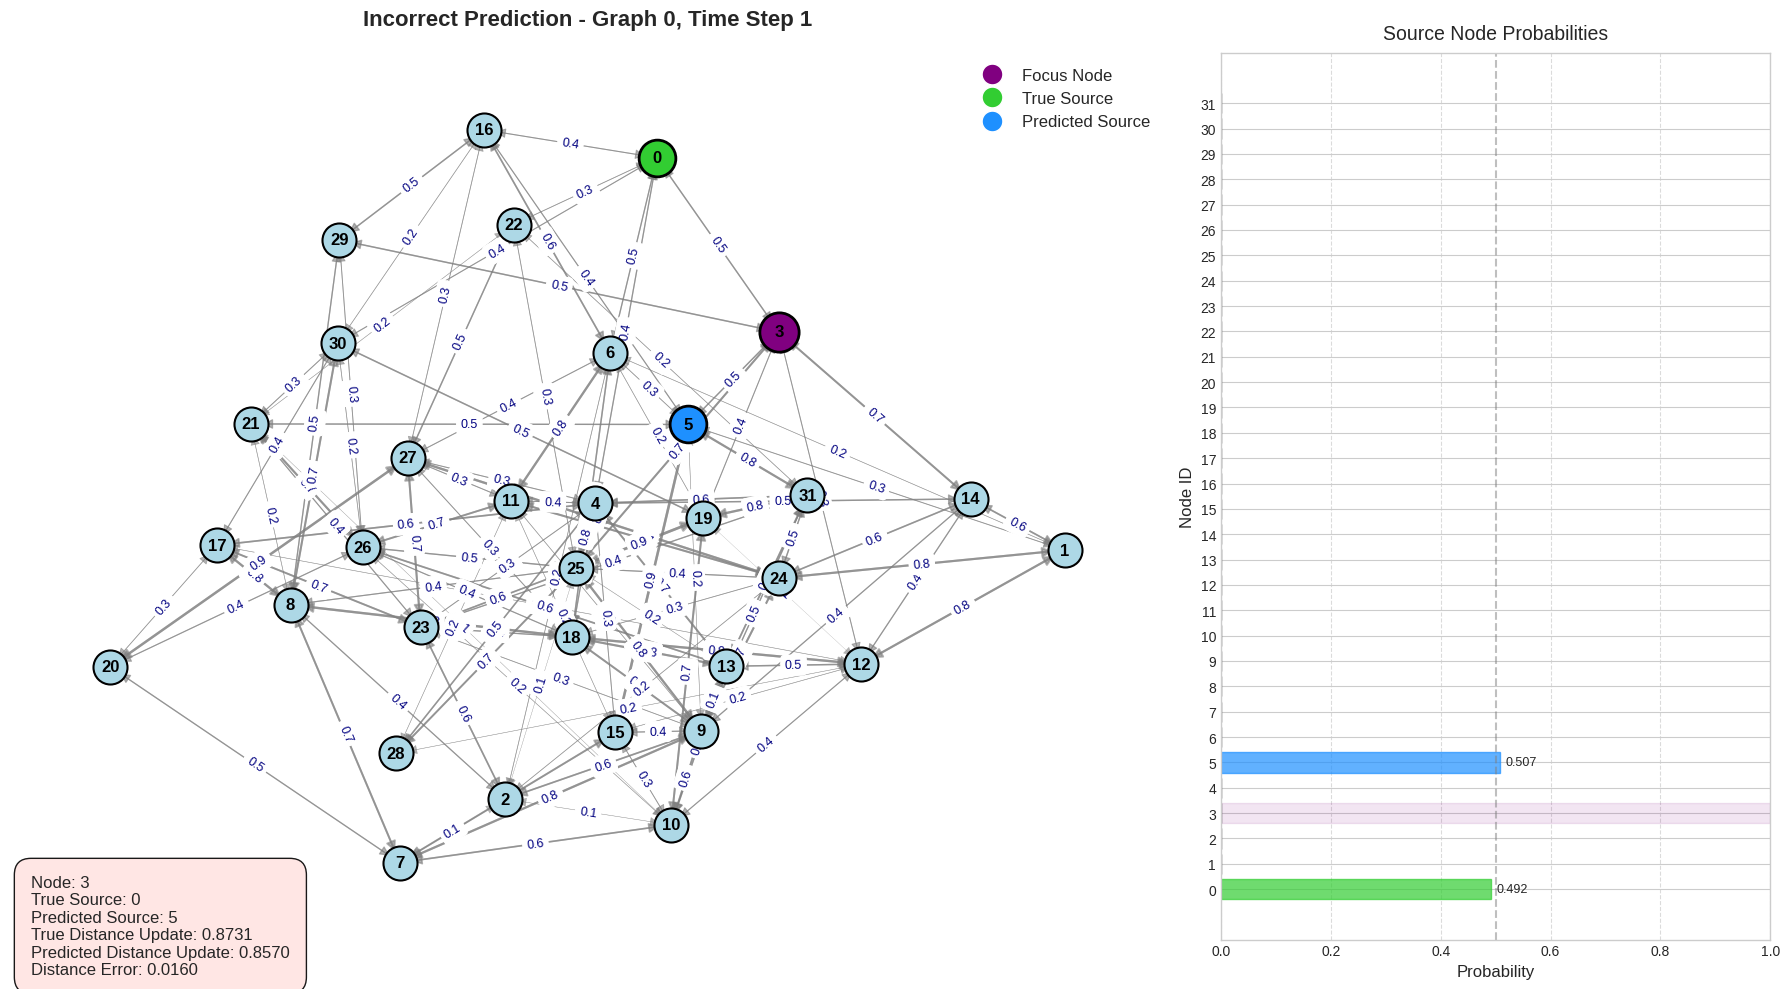


Visualizing error example 2...


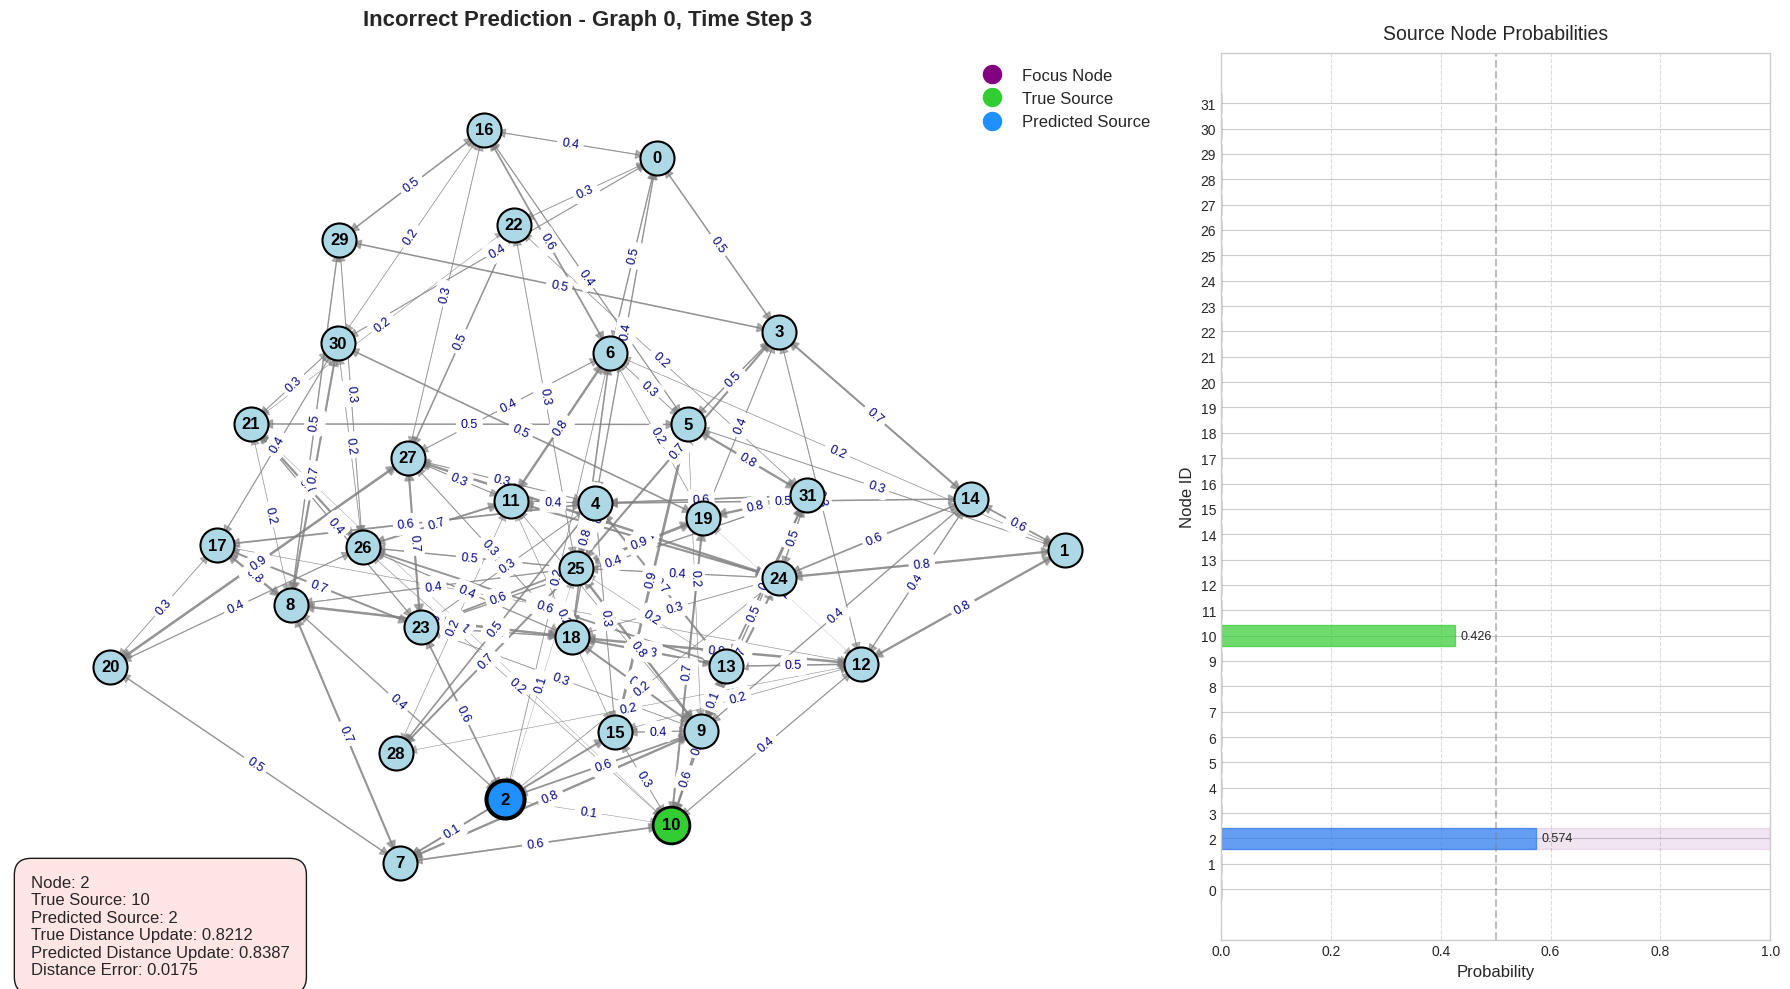


Visualizing error example 3...


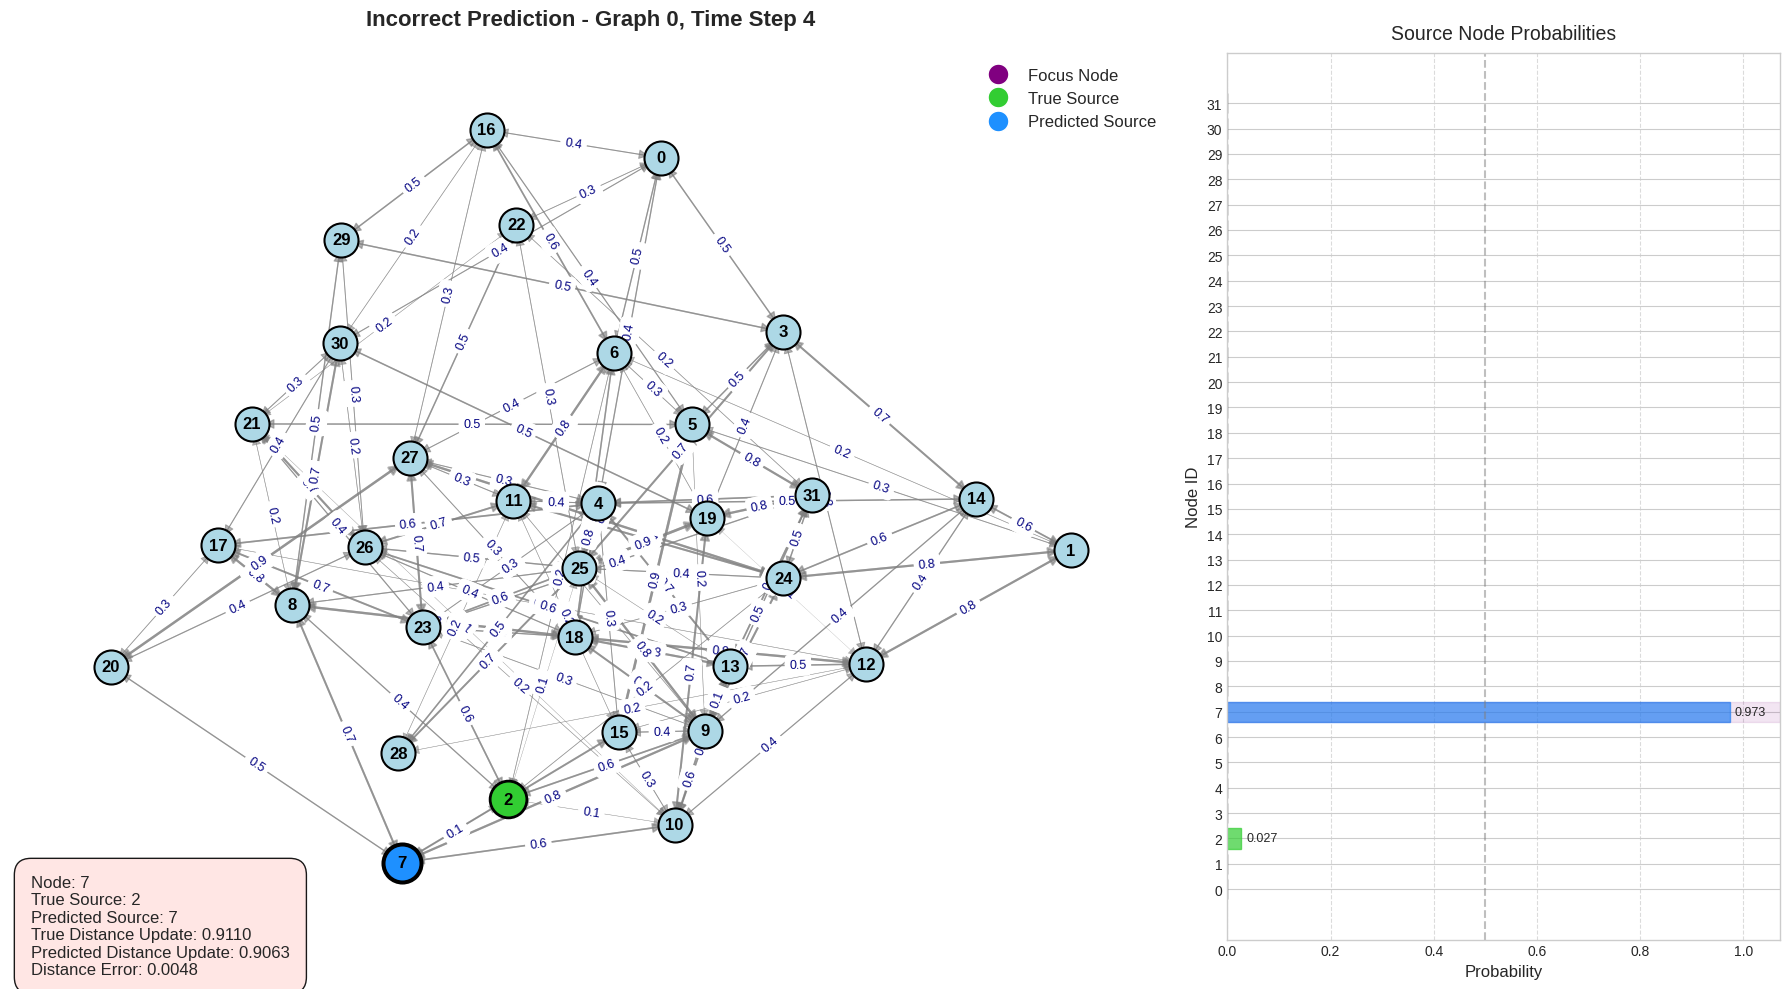


Visualizing error example 4...


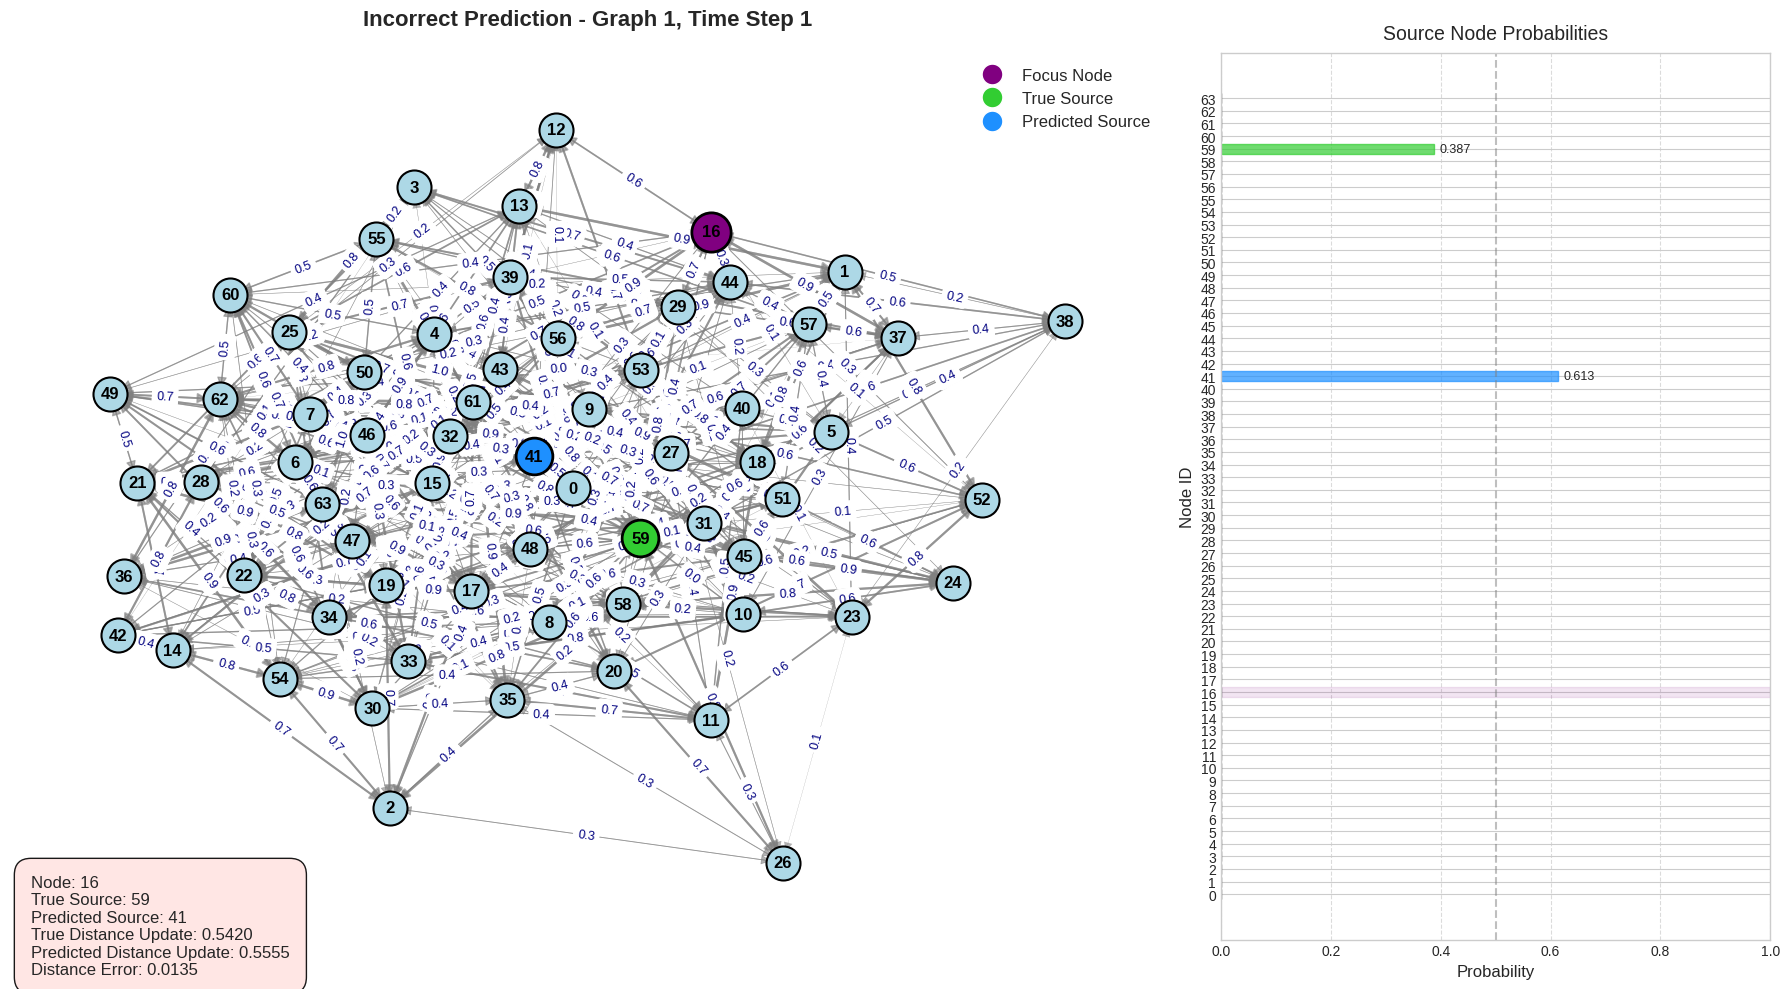


Visualizing error example 5...


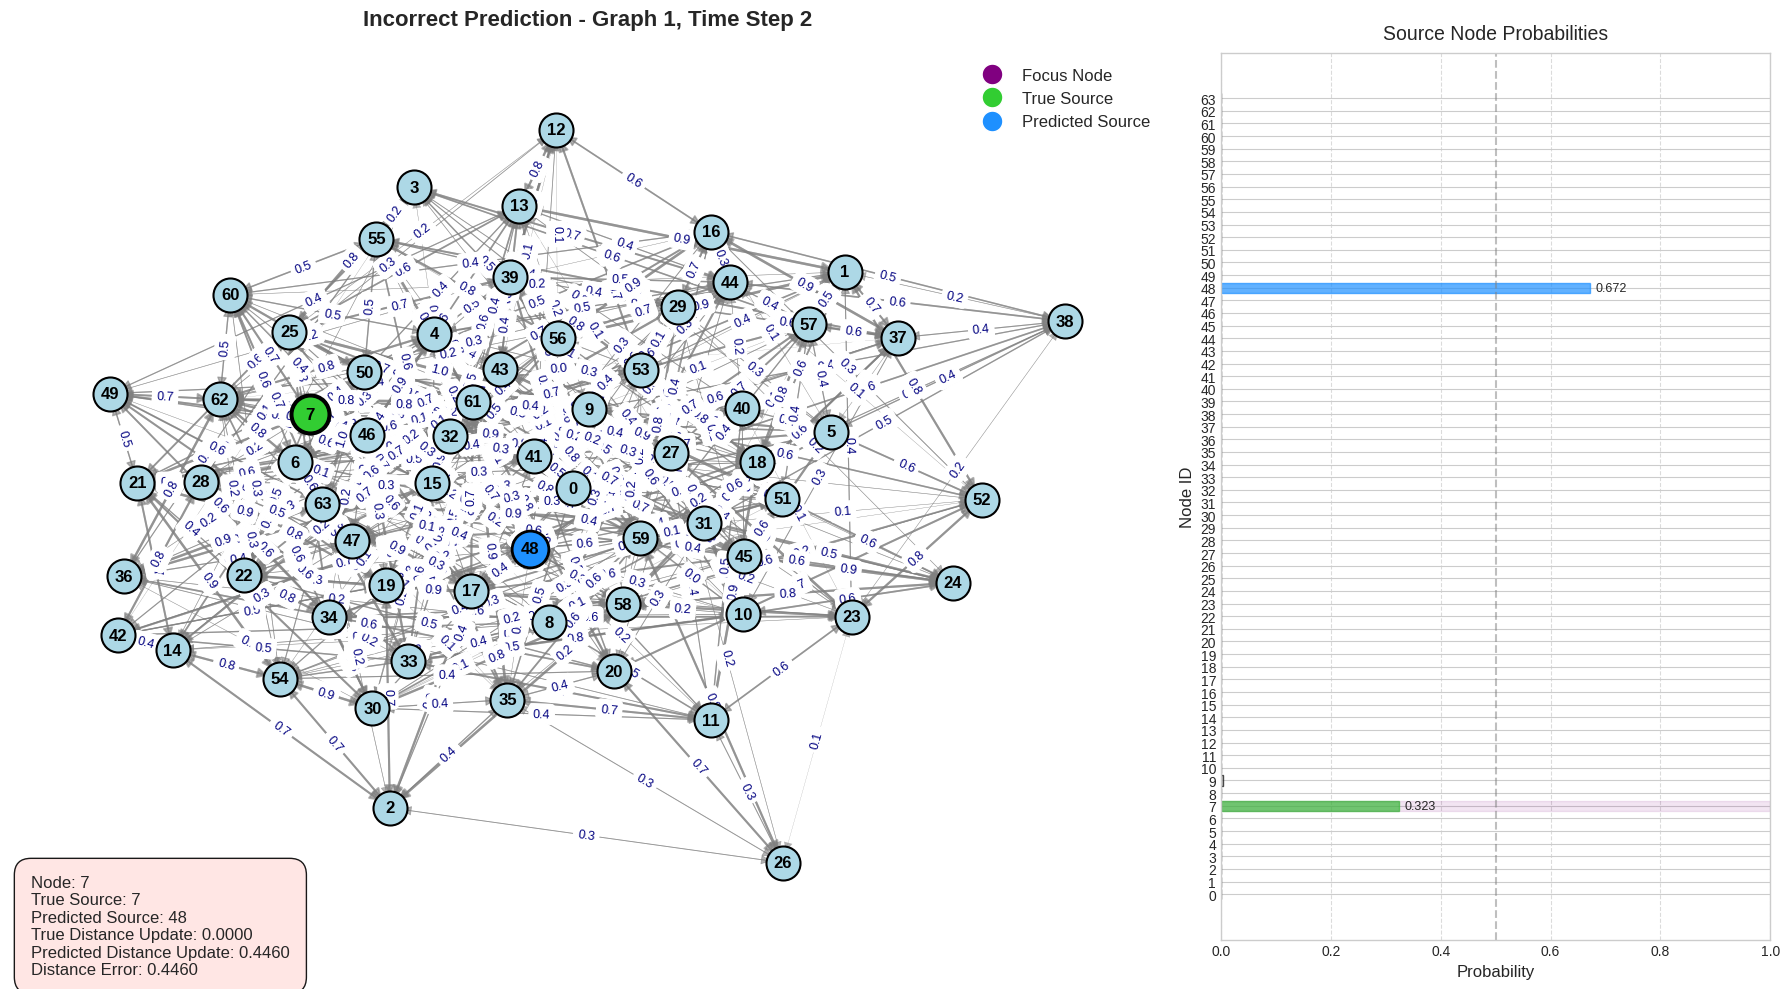


Creating summary visualization of 30 examples...


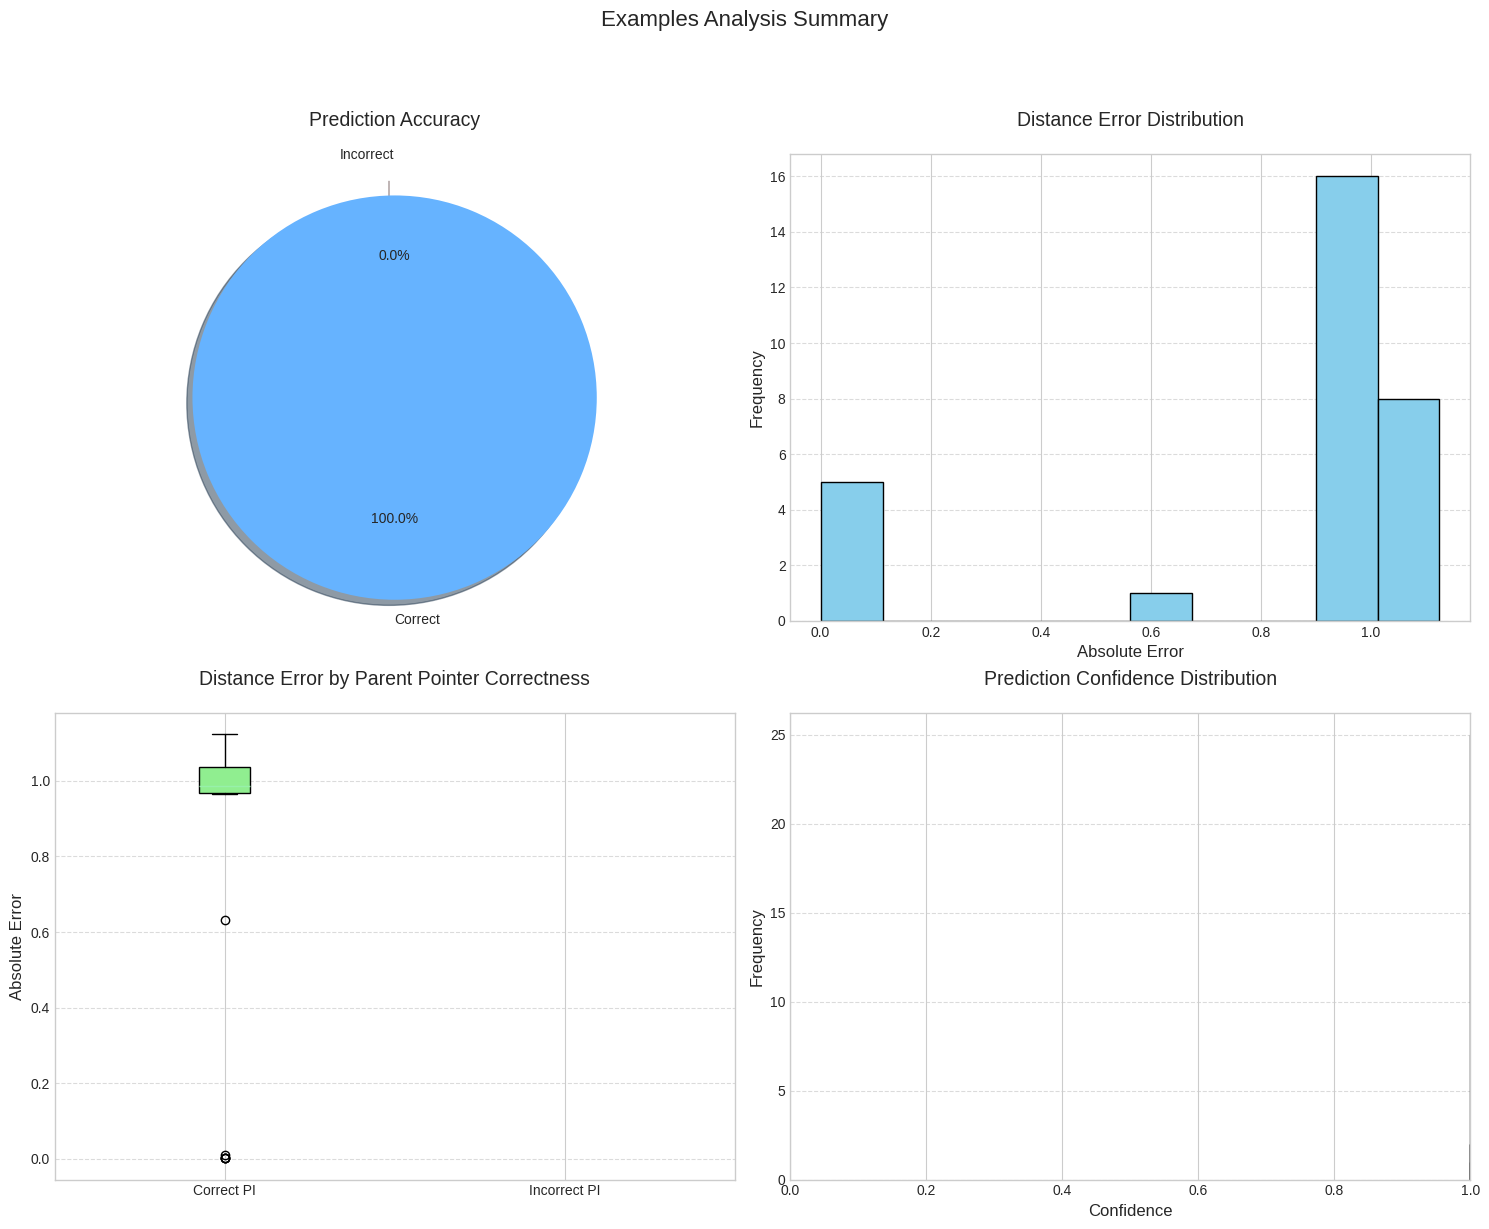

In [12]:
# Import the new analysis functions
from interp.evaluation import analyze_examples, visualize_example, visualize_examples_summary, analyze_model_behavior

# Load a model for analysis
from interp.config import create_model_from_config, load_config
import torch
import os

# Choose an algorithm and model to analyze
alg = "bellman_ford"  # or "bellman_ford" or "bfs" etc
model_name = "gnn_small_all"
checkpoint_source = os.path.join("interp_checkpoints", alg, model_name)

# Load the model
config = load_config(os.path.join(checkpoint_source, model_name + "_config.json"))
model = create_model_from_config(config)
model.load_state_dict(torch.load(os.path.join(checkpoint_source, model_name + ".pth")))
model.eval()

# Choose a dataset for analysis
dataset_path = os.path.join("data", alg, "interp_data_OOD_eval.h5")
nested = False  # Set to True for joint models

# Create a dataset and dataloader
from interp.dataset import HDF5Dataset, custom_collate, nested_custom_collate
from torch.utils.data import DataLoader

dataset = HDF5Dataset(dataset_path, nested=nested)
collate_fn = nested_custom_collate if nested else custom_collate
dataloader = DataLoader(dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Option 1: Comprehensive model behavior analysis
print("Performing comprehensive model behavior analysis...")
results, examples = analyze_model_behavior(model, dataloader, device, num_examples=10000)

# Option 2: Analyze specific examples
print("\nCollecting a mix of correct and incorrect examples...")
mixed_examples = analyze_examples(model, dataloader, device, num_examples=10, error_only=False)

# Visualize the first few examples
for i, example in enumerate(mixed_examples[:5]):
    print(f"\nVisualizing example {i+1} ({'correct' if example['is_correct'] else 'incorrect'})...")
    visualize_example(example)

# Option 3: Focus on error examples only
print("\nCollecting error examples only...")
error_examples = analyze_examples(model, dataloader, device, num_examples=5, error_only=True)

# Visualize all error examples
for i, example in enumerate(error_examples):
    print(f"\nVisualizing error example {i+1}...")
    visualize_example(example)

# Option 5: Create a summary visualization of a larger set of examples
print("\nCreating summary visualization of 30 examples...")
summary_examples = analyze_examples(model, dataloader, device, num_examples=30)
visualize_examples_summary(summary_examples)

# Close the dataset when done
dataset.close()

## Analyse joint statistics

Evaluating: 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_tickl

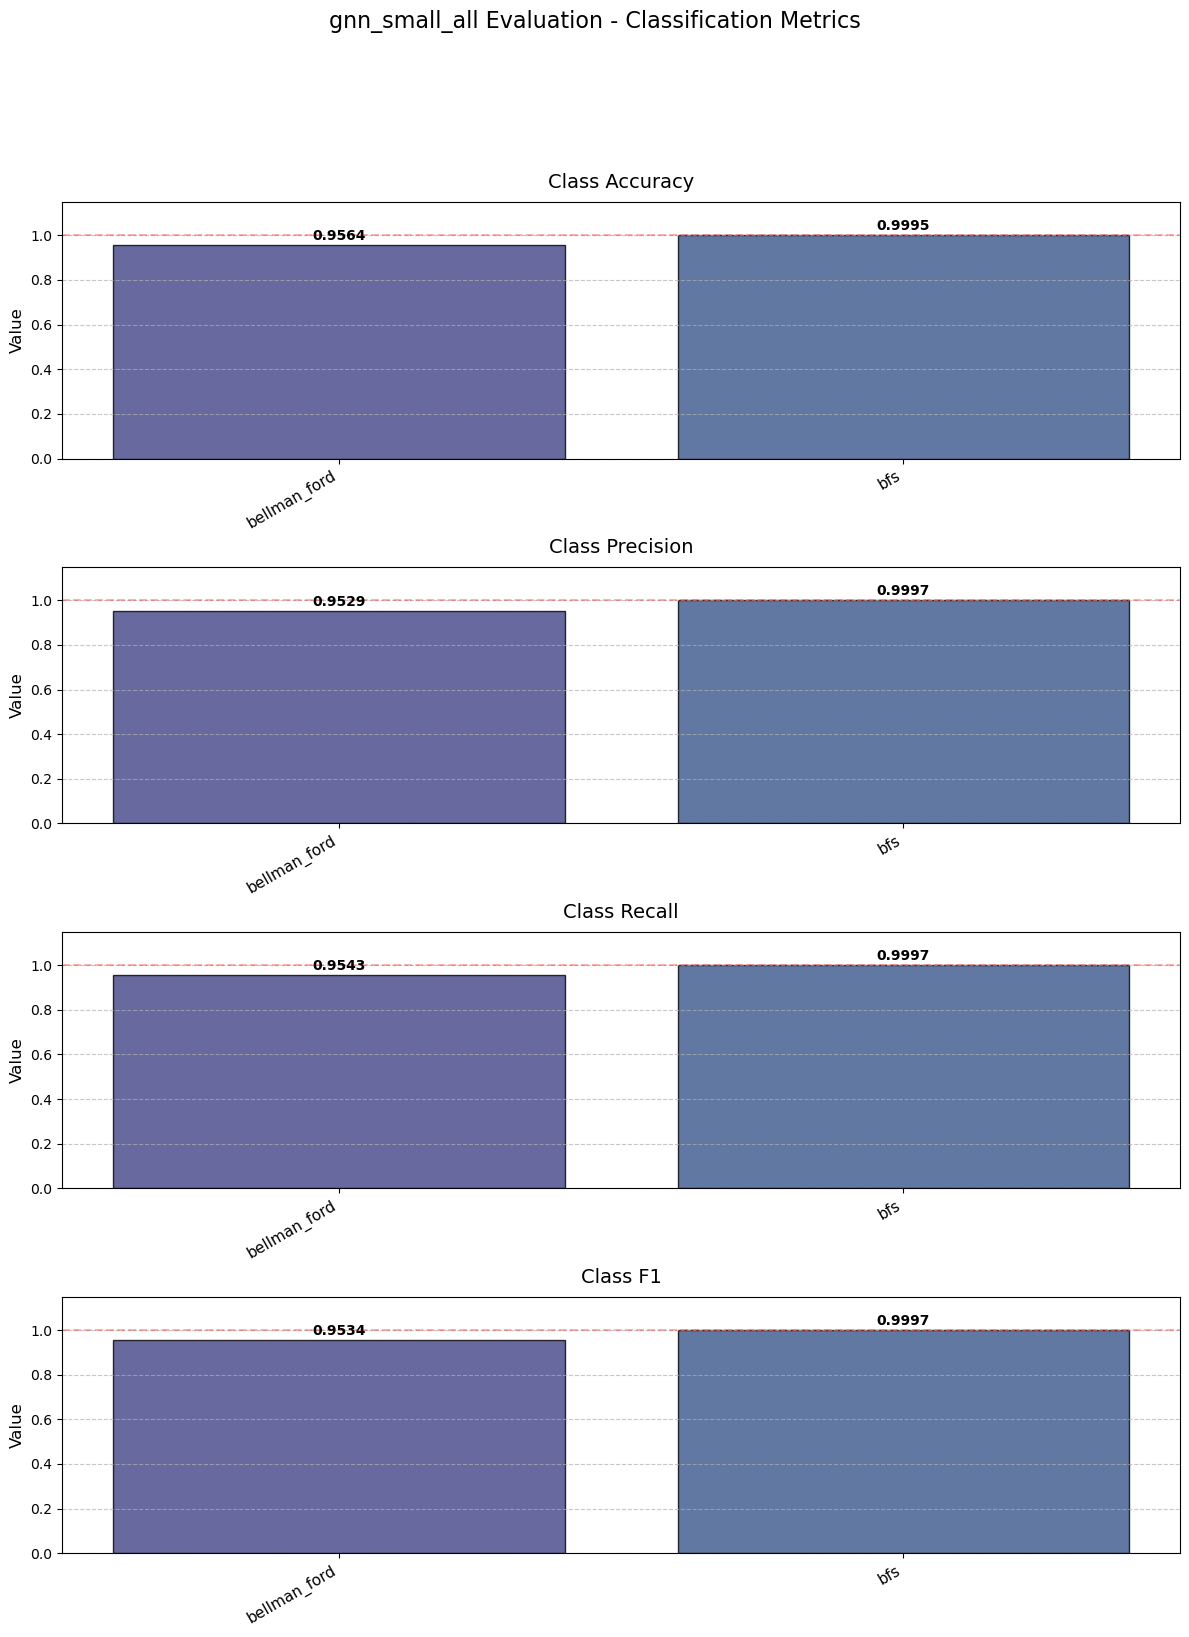

/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)


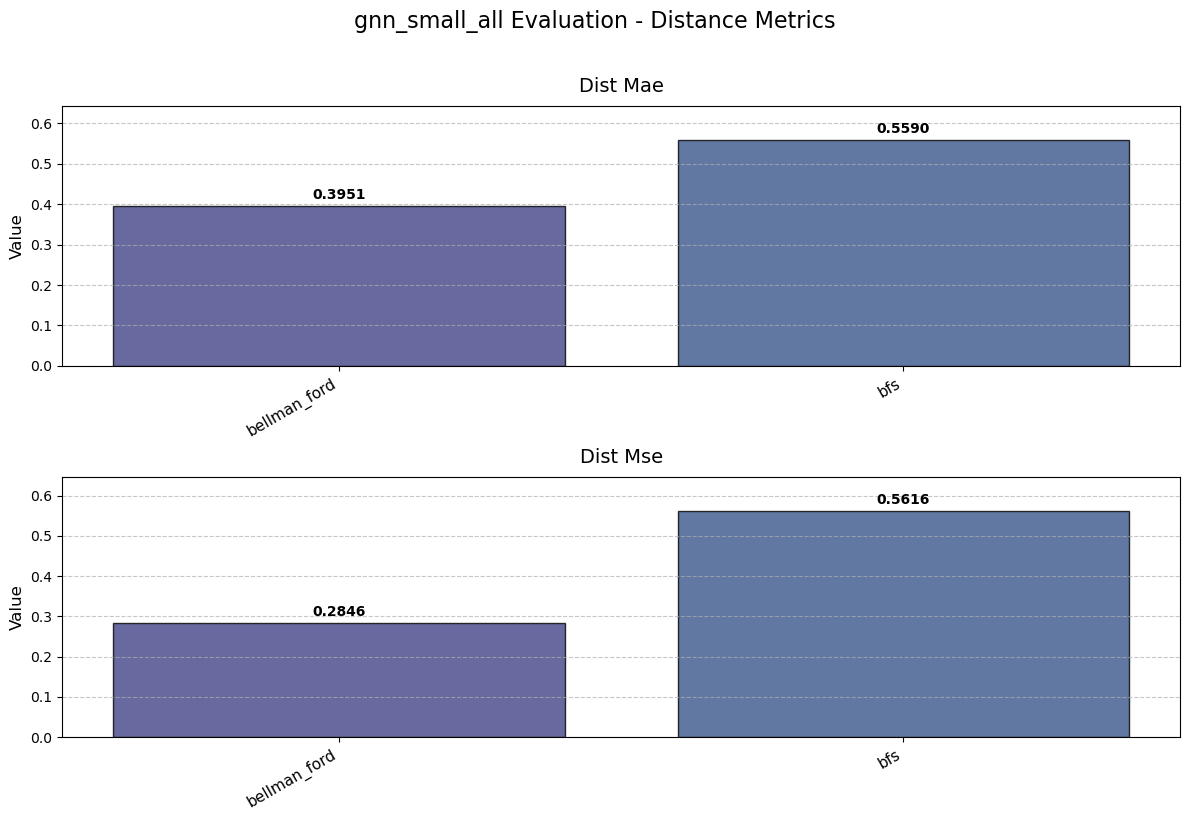

/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)
/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

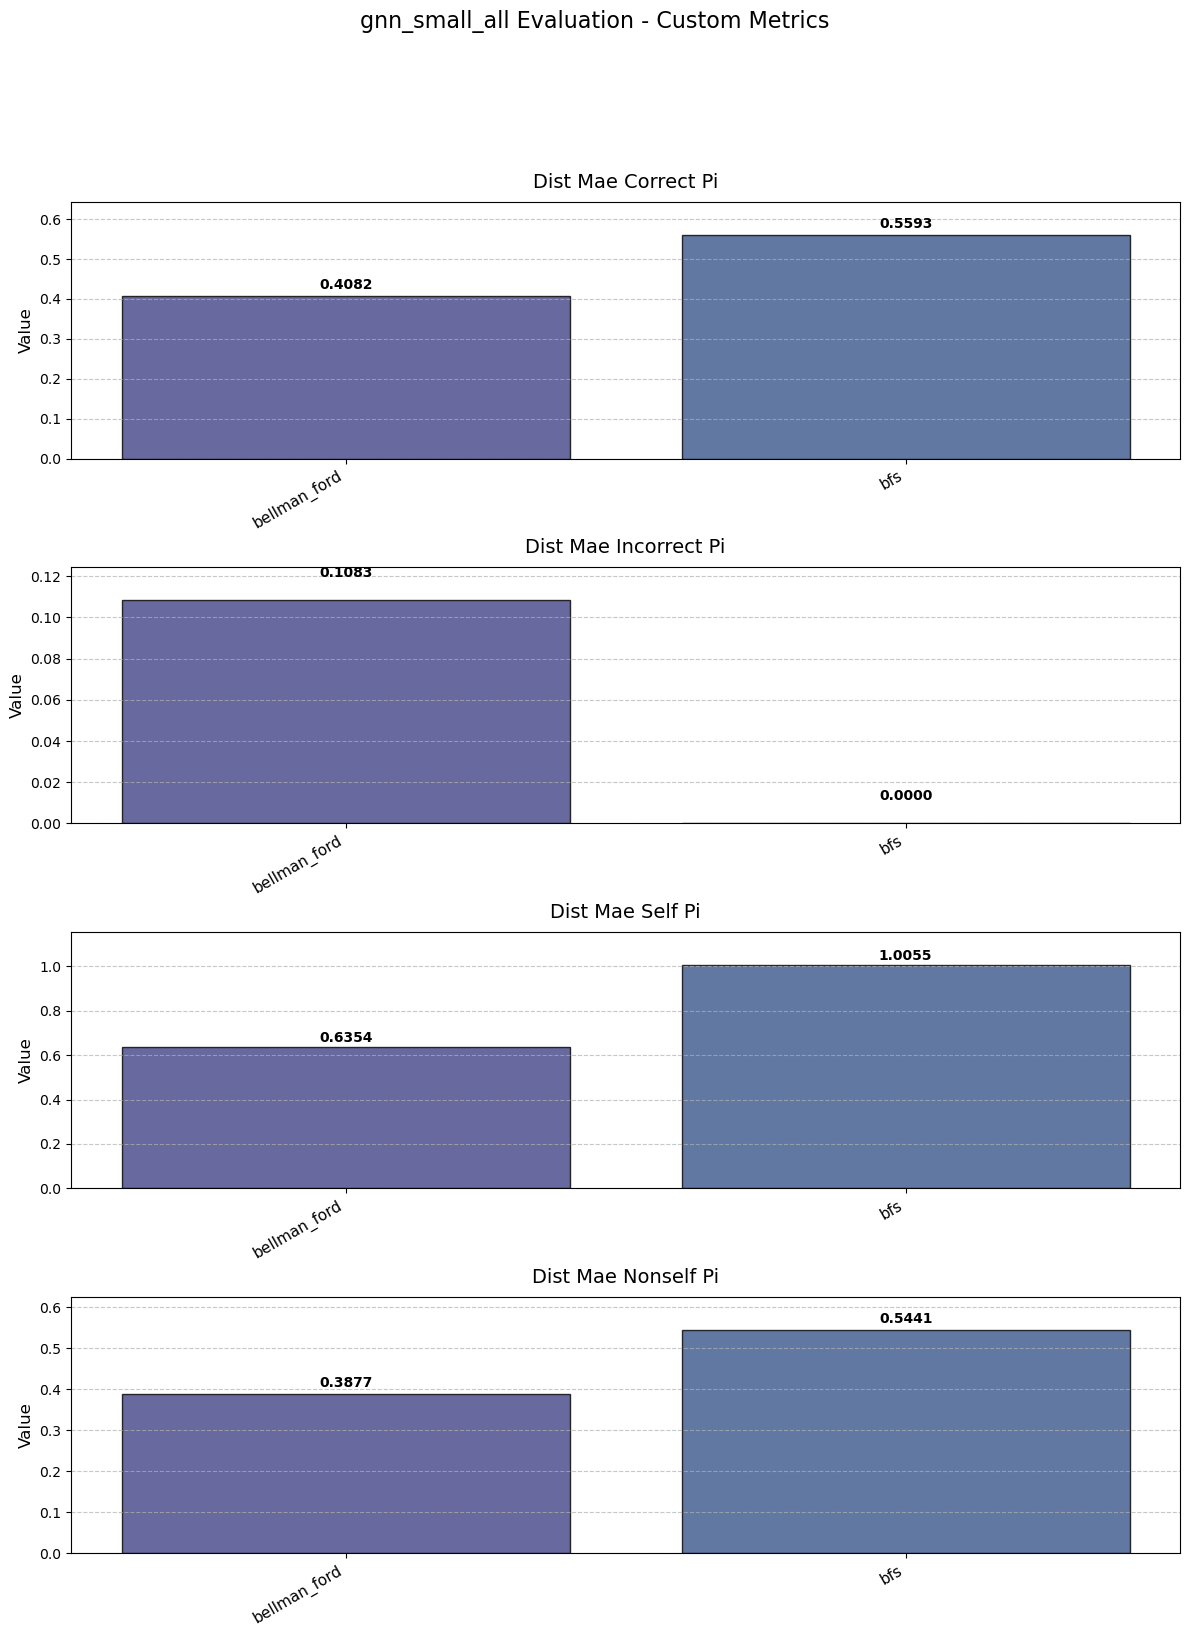

/home/james/Documents/UniWork/GDL/NAR_project/clrs/interp/evaluation.py:460: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(algorithms, rotation=30, ha='right', fontsize=11)


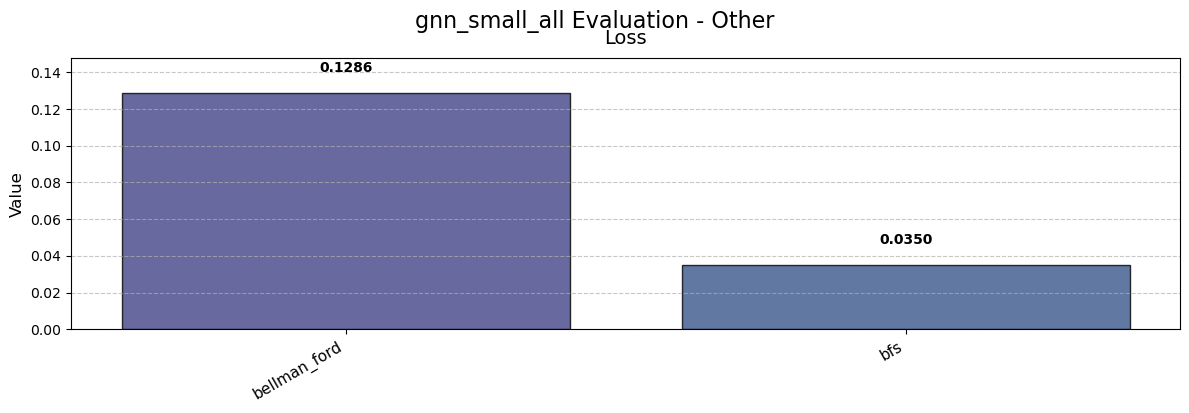

In [1]:
from interp.config import load_config, create_model_from_config
from interp.evaluation import evaluate_model_on_dataset, visualize_results
import torch
import os

# Path to the saved model and its configuration
checkpoint_dir = "interp_checkpoints/bellman_ford_bfs/gnn_small_all"
model_name = "gnn_small_all"
config_path = os.path.join(checkpoint_dir, f"{model_name}_config.json")
model_path = os.path.join(checkpoint_dir, f"{model_name}.pth")

# Load the configuration
config = load_config(config_path)

# Create the model from the configuration
model = create_model_from_config(config)

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Evaluate the model
results = evaluate_model_on_dataset(
    model, 
    dataset_path="data/bellman_ford_bfs/interp_data_OOD_eval.h5",
    batch_size=16,
    nested=True
)

# Visualize the results
visualize_results(results, title=f"{model_name} Evaluation")
